# Table of Contents
1. [Data Exploration](#exploration)

    1.1. [Null Values](#null)
    
    1.2. [Translation](#trans)
    
    1.3. [Outliers](#outliers)
    
    1.4. [Distributions](#dist)
    

2. [Trend Analysis](#trend)

    2.1. [Identify trends among the top YouTube streamers. Which categories are the most popular?](#categories)
    
    2.2. [Is there a correlation between the number of subscribers and the number of likes or comments?](#corr)
    

3. [Audience Study](#audience)
    
    3.1. [Analyze the distribution of streamers' audiences by country. Are there regional preferences for specific content categories?](#audcountry)
    

4. [Performance Metrics](#metrics)

    4.1. [Calculate and visualize the average number of subscribers, visits, likes, and comments](#average)
    
    4.2. [Are there patterns or anomalies in these metrics](#patterns)
    
    
5. [Content Categories](#content)

    5.1. [Explore the distribution of content categories. Which categories have the highest number of streamers?](#distcat)
    
    5.2. [Are there specific categories with exceptional performance metrics?](#catmetrics)
    
    
6. [Benchmarking](#benchmark)

    6.1. [Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.](#performance)
    
    6.2. [Who are the top-performing content creators?](#top)
    

7. [Content Recommendations](#recommend)

    7.1. [Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics.](#system)
    

In [89]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import LabelEncoder

# Imputing
import miceforest as mf

# Translation
from googletrans import Translator

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration <a name="exploration"></a>

In [2]:
df = pd.read_csv("youtubers_df.csv")

In [3]:
df.head(50)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


We can see that the Categories column has missing values and is in Spanish, so we will need to deal with the missing values, then translate.

## 1.1. Null Values <a name="null"></a>

In [4]:
# Check for nulls
df.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [5]:
df.shape

(1000, 9)

Approximately, one-third of the categories are missing. This will cause issues analysing the data, so we will impute the missing values with the MICE imputer since so many of the categories are missing.

In [6]:
# Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
# Changing spelling error in column name
df["Subscribers"] = df["Suscribers"]

In [8]:
# Dropping redundant columns
df = df.drop(['Links', 'Suscribers'],axis = 1)

In [9]:
# change the objects to category types so that the imputer can work with the dtype
for column in df:
    if df[column].dtype == object:
        df[column] = df[column].astype("category")
    else: 
        pass

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rank         1000 non-null   int64   
 1   Username     1000 non-null   category
 2   Categories   694 non-null    category
 3   Country      1000 non-null   category
 4   Visits       1000 non-null   float64 
 5   Likes        1000 non-null   float64 
 6   Comments     1000 non-null   float64 
 7   Subscribers  1000 non-null   float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 85.8 KB


In [11]:
# Create kernel. 
kds = mf.ImputationKernel(
  df,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 30 iterations
kds.mice(30)

# Return the completed dataset.
df_imputed = kds.complete_data()

In [12]:
# # Convert floats to ints for analysis
# for column in df:
#     if df_imputed[column].dtype == float:
#         df_imputed[column] = df[column].astype("int64")
#     else:
#         pass

In [13]:
df_imputed.head()

,Rank,Username,Categories,Country,Visits,Likes,Comments,Subscribers
0,1,tseries,Música y baile,India,86200.0,2700.0,78.0,249500000.0
1,2,MrBeast,"Videojuegos, Humor",Estados Unidos,117400000.0,5300000.0,18500.0,183500000.0
2,3,CoComelon,Educación,Unknown,7000000.0,24700.0,0.0,165500000.0
3,4,SETIndia,"Películas, Animación",India,15600.0,166.0,9.0,162600000.0
4,5,KidsDianaShow,"Animación, Juguetes",Unknown,3900000.0,12400.0,0.0,113500000.0


## 1.2. Translation <a name="trans"></a>

Since the Categories and Countries columns are in Spanish, we will need to translate them to English. 

In [14]:
# Output a list of the unique categories
df_imputed["Categories"].value_counts()

Categories
Música y baile                        261
Películas, Animación                   92
Vlogs diarios                          60
Noticias y Política                    56
Música y baile, Películas              54
Animación, Videojuegos                 48
Películas, Humor                       47
Animación, Humor                       41
Animación, Juguetes                    40
Educación                              31
Películas                              27
Animación                              24
Música y baile, Animación              22
Videojuegos                            20
Videojuegos, Humor                     19
Ciencia y tecnología                   18
Comida y bebida                        14
Humor                                  13
Películas, Juguetes                    12
Juguetes                               10
Deportes                                9
Películas, Videojuegos                  9
Música y baile, Humor                   8
Educación, Juguetes    

In [15]:
# Output a list of the unique countries
df_imputed["Country"].value_counts()

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Arabia Saudita      4
Francia             4
España              4
Turquía             4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Argelia             2
Marruecos           2
Perú                2
Somalia             1
Ecuador             1
Singapur            1
El Salvador         1
Jordania            1
Name: count, dtype: int64

These lists are quite long, so we will use the googletrans library to help us translate the dataframe.

In [16]:

translator = Translator()
df_imputed['Categories'] = df_imputed['Categories'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )
df_imputed['Country'] = df_imputed['Country'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )

In [17]:
df_imputed.head()

,Rank,Username,Categories,Country,Visits,Likes,Comments,Subscribers
0,1,tseries,Music and dance,India,86200.0,2700.0,78.0,249500000.0
1,2,MrBeast,"Video games, humor",USA,117400000.0,5300000.0,18500.0,183500000.0
2,3,CoComelon,Education,Unknown,7000000.0,24700.0,0.0,165500000.0
3,4,SETIndia,"Movies, animation",India,15600.0,166.0,9.0,162600000.0
4,5,KidsDianaShow,"Animation, toys",Unknown,3900000.0,12400.0,0.0,113500000.0


## 1.3. Outliers <a name="outliers"></a>

Text(0.5, 1.0, 'Comments')

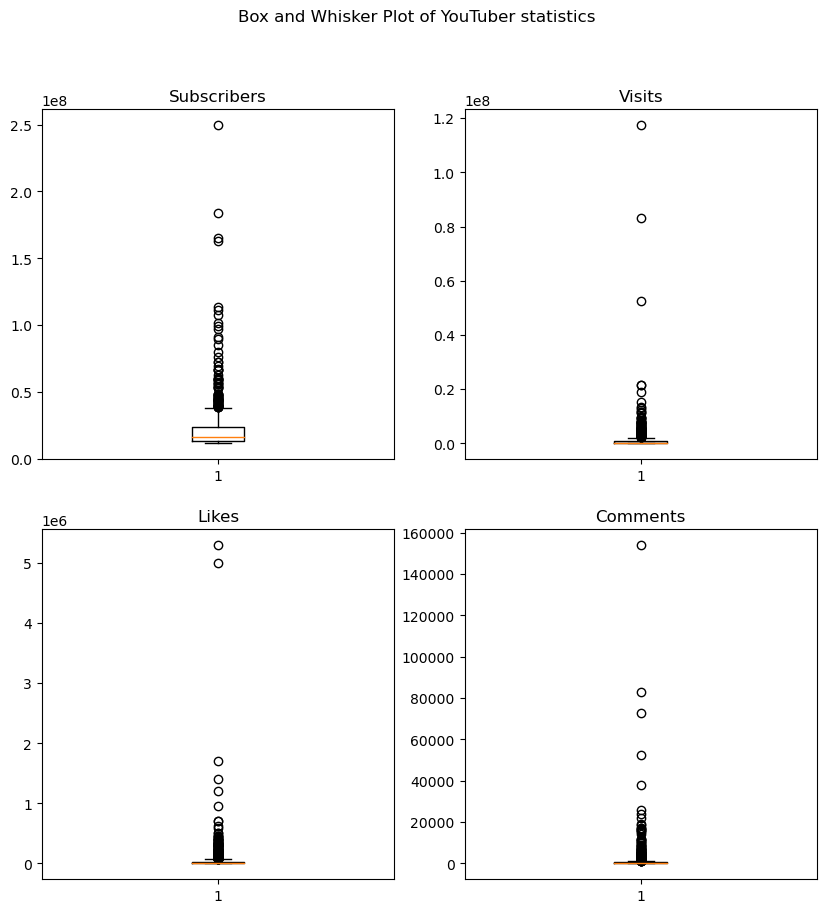

In [18]:
# Create a side by side box plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box and Whisker Plot of YouTuber statistics')
ax1.boxplot(x='Subscribers', data=df_imputed)
ax2.boxplot(x='Visits', data=df_imputed)
ax3.boxplot(x='Likes', data=df_imputed)
ax4.boxplot(x='Comments', data=df_imputed)

ax1.set_title('Subscribers')
ax2.set_title('Visits')
ax3.set_title('Likes')
ax4.set_title('Comments')

While there appear to be outliers, due to the nature of YouTube and "going viral" we cannot assume that these are simply mistakes and discard them.

To check if these are data entry errors or genuinely large numbers, we will look at a subset of them to see if the other numbers are also large. This is because when a YouTuber goes viral, we would expect a large number of visits to generate large numbers of likes, comments, and subscribers.

In [19]:
df_imputed[df_imputed["Visits"]>20000000]

,Rank,Username,Categories,Country,Visits,Likes,Comments,Subscribers
1,2,MrBeast,"Video games, humor",USA,117400000.0,5300000.0,18500.0,183500000.0
136,137,MrBeast2,Vlogs daily,USA,83100000.0,5000000.0,11600.0,31300000.0
153,154,DaFuqBoom,"Animation, humor",USA,52700000.0,1700000.0,82800.0,29800000.0
288,289,VillageCookingChannel,Food and drink,India,21500000.0,321500.0,5900.0,22500000.0
488,489,BeastPhilanthropy,Food and drink,USA,21500000.0,952100.0,24000.0,16900000.0


Many of the values are outliers, so it fits that this is a case of going viral since all the numbers are high instead of just one anomalous value. To better understand this phenomenon, we should leave these outliers in the data.

## 1.4. Distributions <a name="dist"></a>

In [20]:
df_imputed.describe()

,Rank,Visits,Likes,Comments,Subscribers
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,1.209446e+06,5.363259e+04,1288.768000,2.189440e+07
std,288.819436,5.229942e+06,2.580457e+05,6778.188308,1.682775e+07
min,1.000000,0.000000e+00,0.000000e+00,0.000000,1.170000e+07
25%,250.750000,3.197500e+04,4.717500e+02,2.000000,1.380000e+07
50%,500.500000,1.744500e+05,3.500000e+03,67.000000,1.675000e+07
75%,750.250000,8.654750e+05,2.865000e+04,472.000000,2.370000e+07
max,1000.000000,1.174000e+08,5.300000e+06,154000.000000,2.495000e+08


What we can gather from the summary statistics are as follows:
- Subscriber count is very high due to these being the highest ranked YouTubers
- Visits had a high variation, with a standard deviation of 5 229 942 visits. Some channels had as little as 0 visits while others had as much as 117 400 000 visits 
- Likes also had a high variation with a standard deviation of 258 046 likes. Some channels received no likes while others received as many as 5 300 000 likes.
- Comments had a high variation, with a standard deviation of 6778 comments. Some channels received no comments while others received as many as 154 000 comments

Text(0.5, 1.0, 'Occurence of Categories Among the Top 1000 YouTubers')

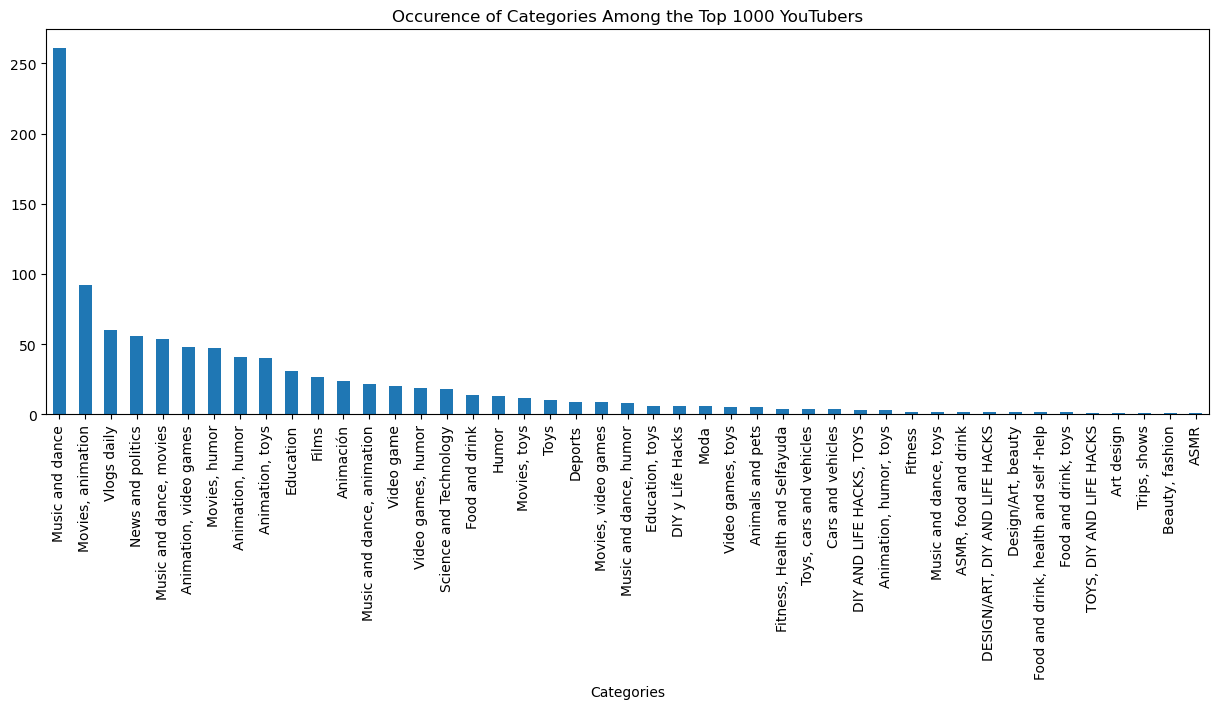

In [21]:
df_imputed['Categories'].value_counts().plot(kind='bar',figsize=[15,5])
plt.title('Occurence of Categories Among the Top 1000 YouTubers') 

Music videos with dancing is the most common category of the top YouTubers. Movies, vlogs, and video games are also quite common

Text(0.5, 1.0, 'Location Among the Top 1000 YouTubers')

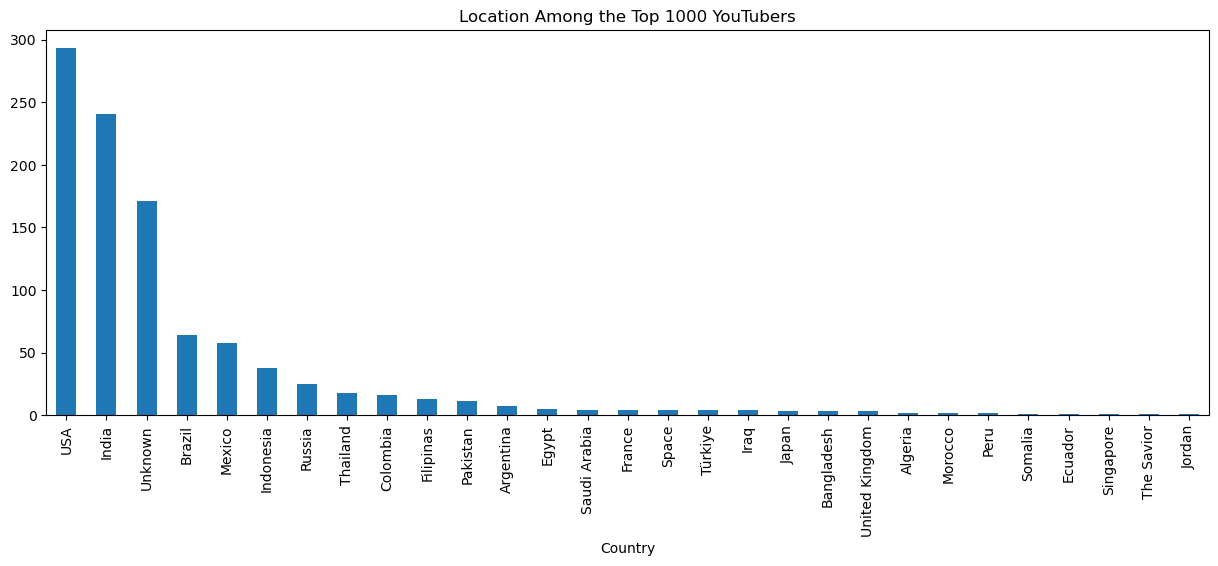

In [22]:
df_imputed['Country'].value_counts().plot(kind='bar',figsize=[15,5])
plt.title('Location Among the Top 1000 YouTubers') 

The most common country popular YouTubers are from is the United States, followed closely by India. A large portion (~ 15%) of the data has YouTubers from undisclosed locations.

Text(0.5, 1.0, 'Comments')

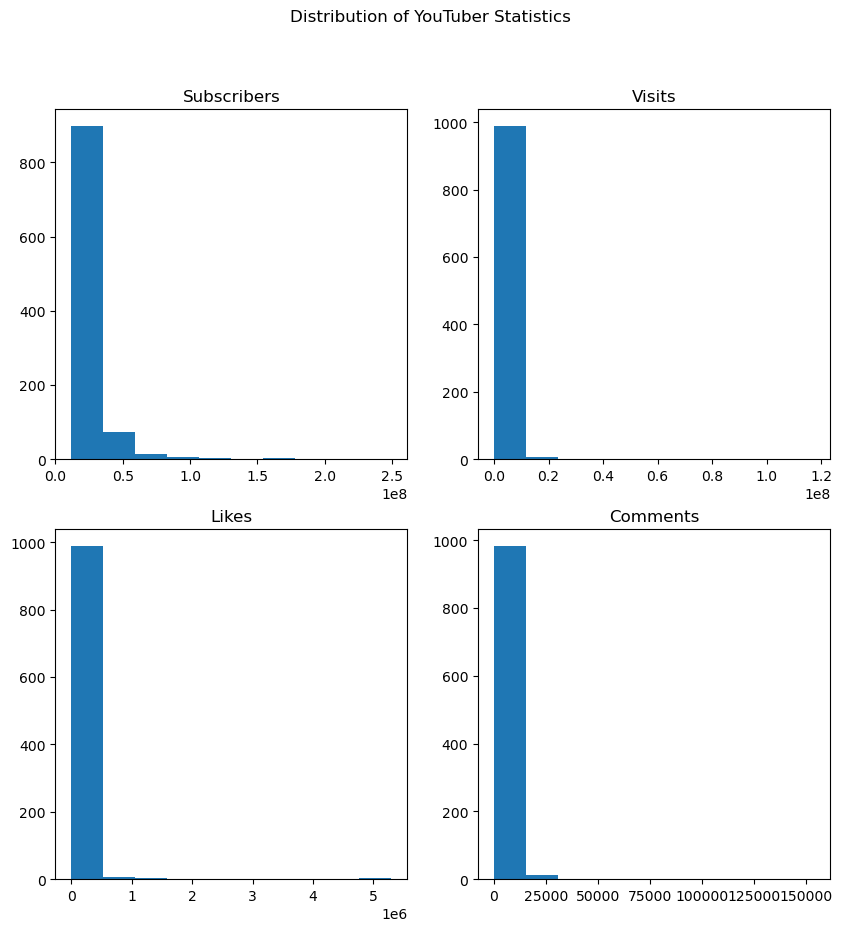

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Distribution of YouTuber Statistics')
ax1.hist(x='Subscribers', data=df_imputed)
ax2.hist(x='Visits', data=df_imputed)
ax3.hist(x='Likes', data=df_imputed)
ax4.hist(x='Comments', data=df_imputed)

ax1.set_title('Subscribers')
ax2.set_title('Visits')
ax3.set_title('Likes')
ax4.set_title('Comments')

The subscribers, visits, likes, and comments are very right-skewed with some bumps around towards the right. These are likely YouTubers who have "gone viral" and have far more visits than the others.

# 2. Trend Analysis <a name="trend"></a>

## 2.1. Identify trends among the top YouTube streamers. Which categories are the most popular? <a name="categories"></a>

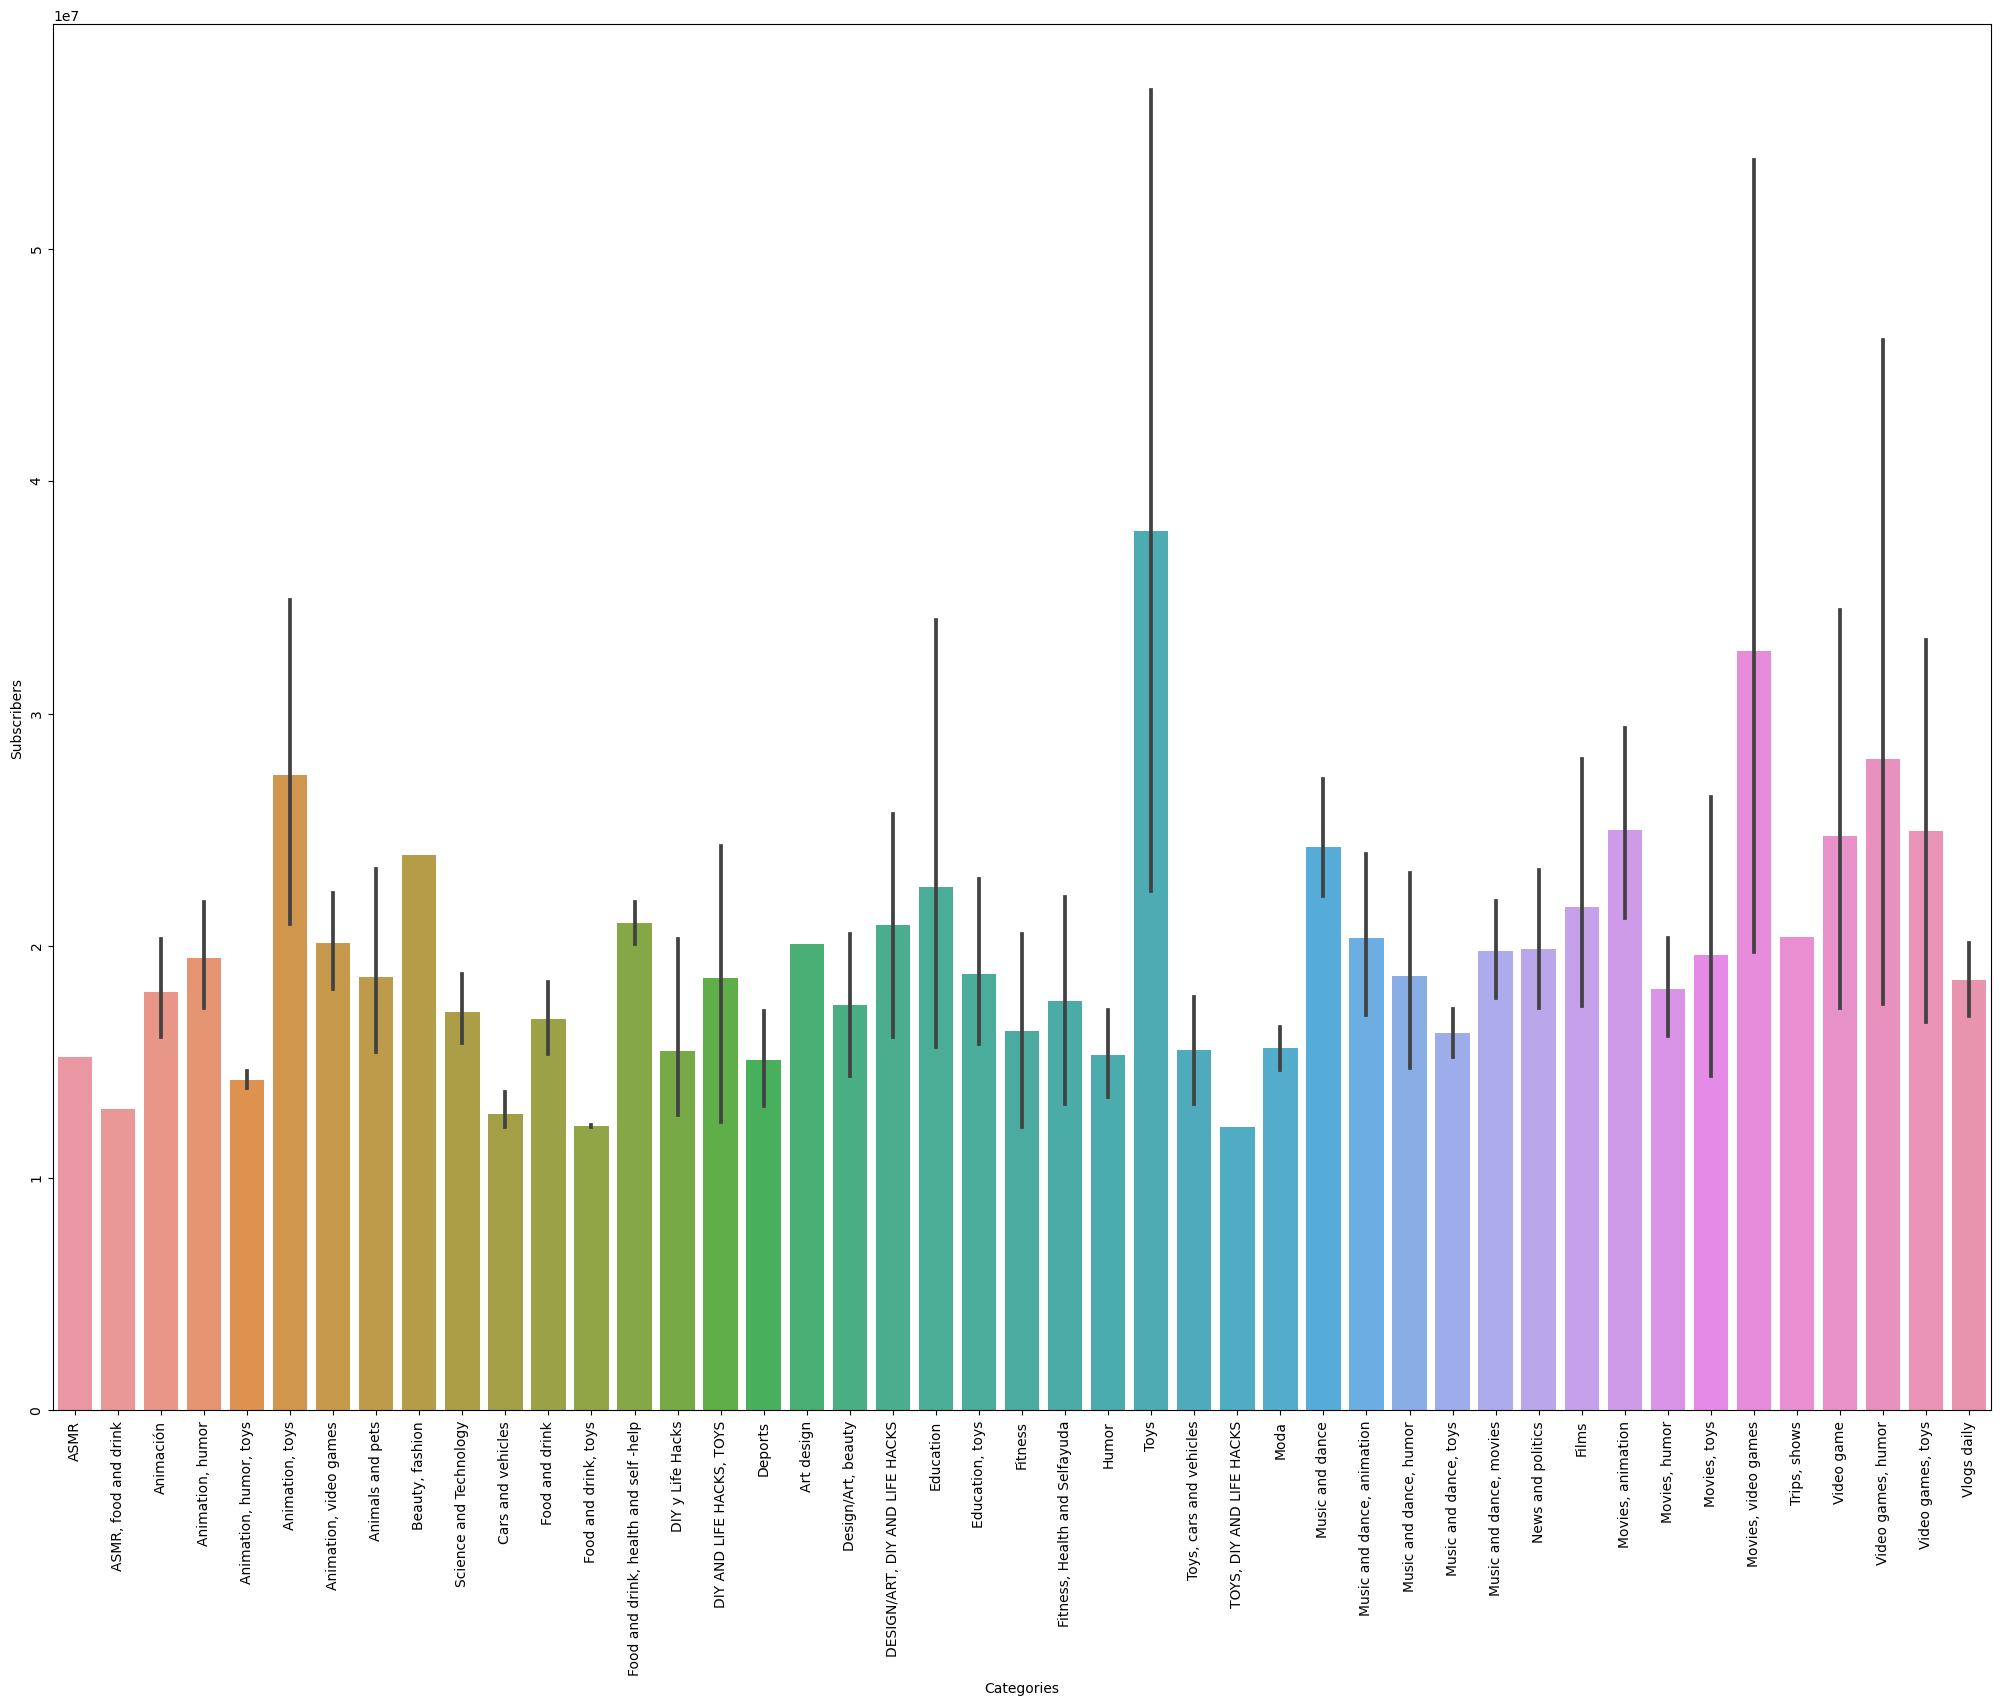

In [24]:
plt.figure(figsize=[25,18])
sns.barplot(x='Categories', y='Subscribers', data=df_imputed)
plt.tick_params(labelrotation=90)

The most popular categories appear to be toys and movies about video games.

## 2.2. Is there a correlation between the number of subscribers and the number of likes or comments? <a name="corr"></a>

In [25]:

corr_df = df_imputed.copy()
# Convert target label to numerical Data
le = LabelEncoder()
corr_df['Categories'] = le.fit_transform(corr_df['Categories'])
corr_df['Country'] = le.fit_transform(corr_df['Country'])

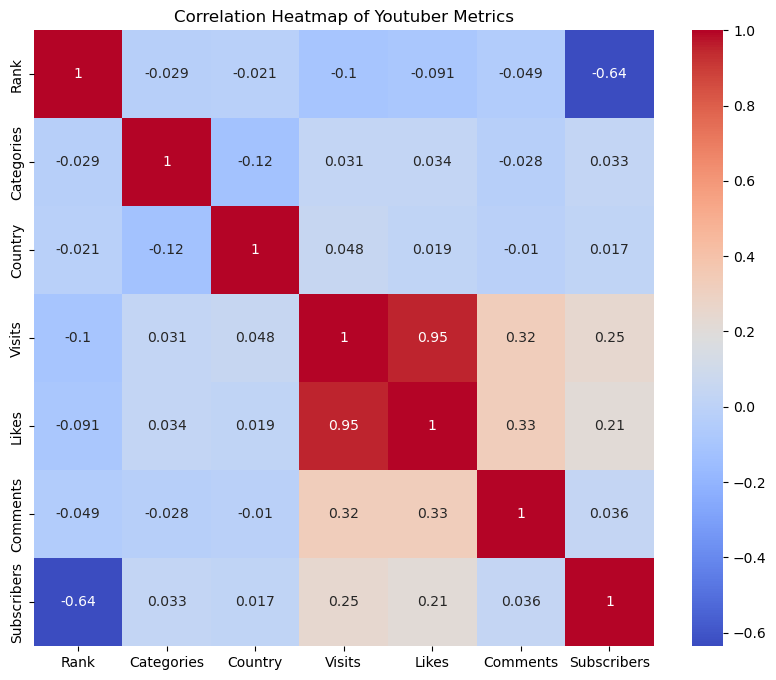

In [26]:
# Calculate correlation matrix
correlation_matrix = corr_df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Youtuber Metrics")
plt.show()

From this we can see the following correlations:

   - Rank was weakly inversely correlated with the number of visits and strongly inversely correlated with the number of subscribers.    
   - Categories were weakly inversely correlated with country, so YouTubers tend to have categories correlated with the country they are in.    
   - Visits were strongly correlated with likes, moderately correlated with comments and weakly correlated with subscribers.
   - Likes were moderately correlated with comments and weakly correlated with subscribers.
    

Most popular categories and the analysis can be seen under: 1.4. [Distributions](#dist)

As seen above, comments does not have a significant correlation with subscriber count. The number of likes is weakly correlated with the subscriber count. 

# 3. Audience Study <a name="audience"></a>

## 3.1. Analyze the distribution of streamers' audiences by country. Are there regional preferences for specific content categories? <a name="audcountry"></a>

<Axes: xlabel='Country', ylabel='Subscribers'>

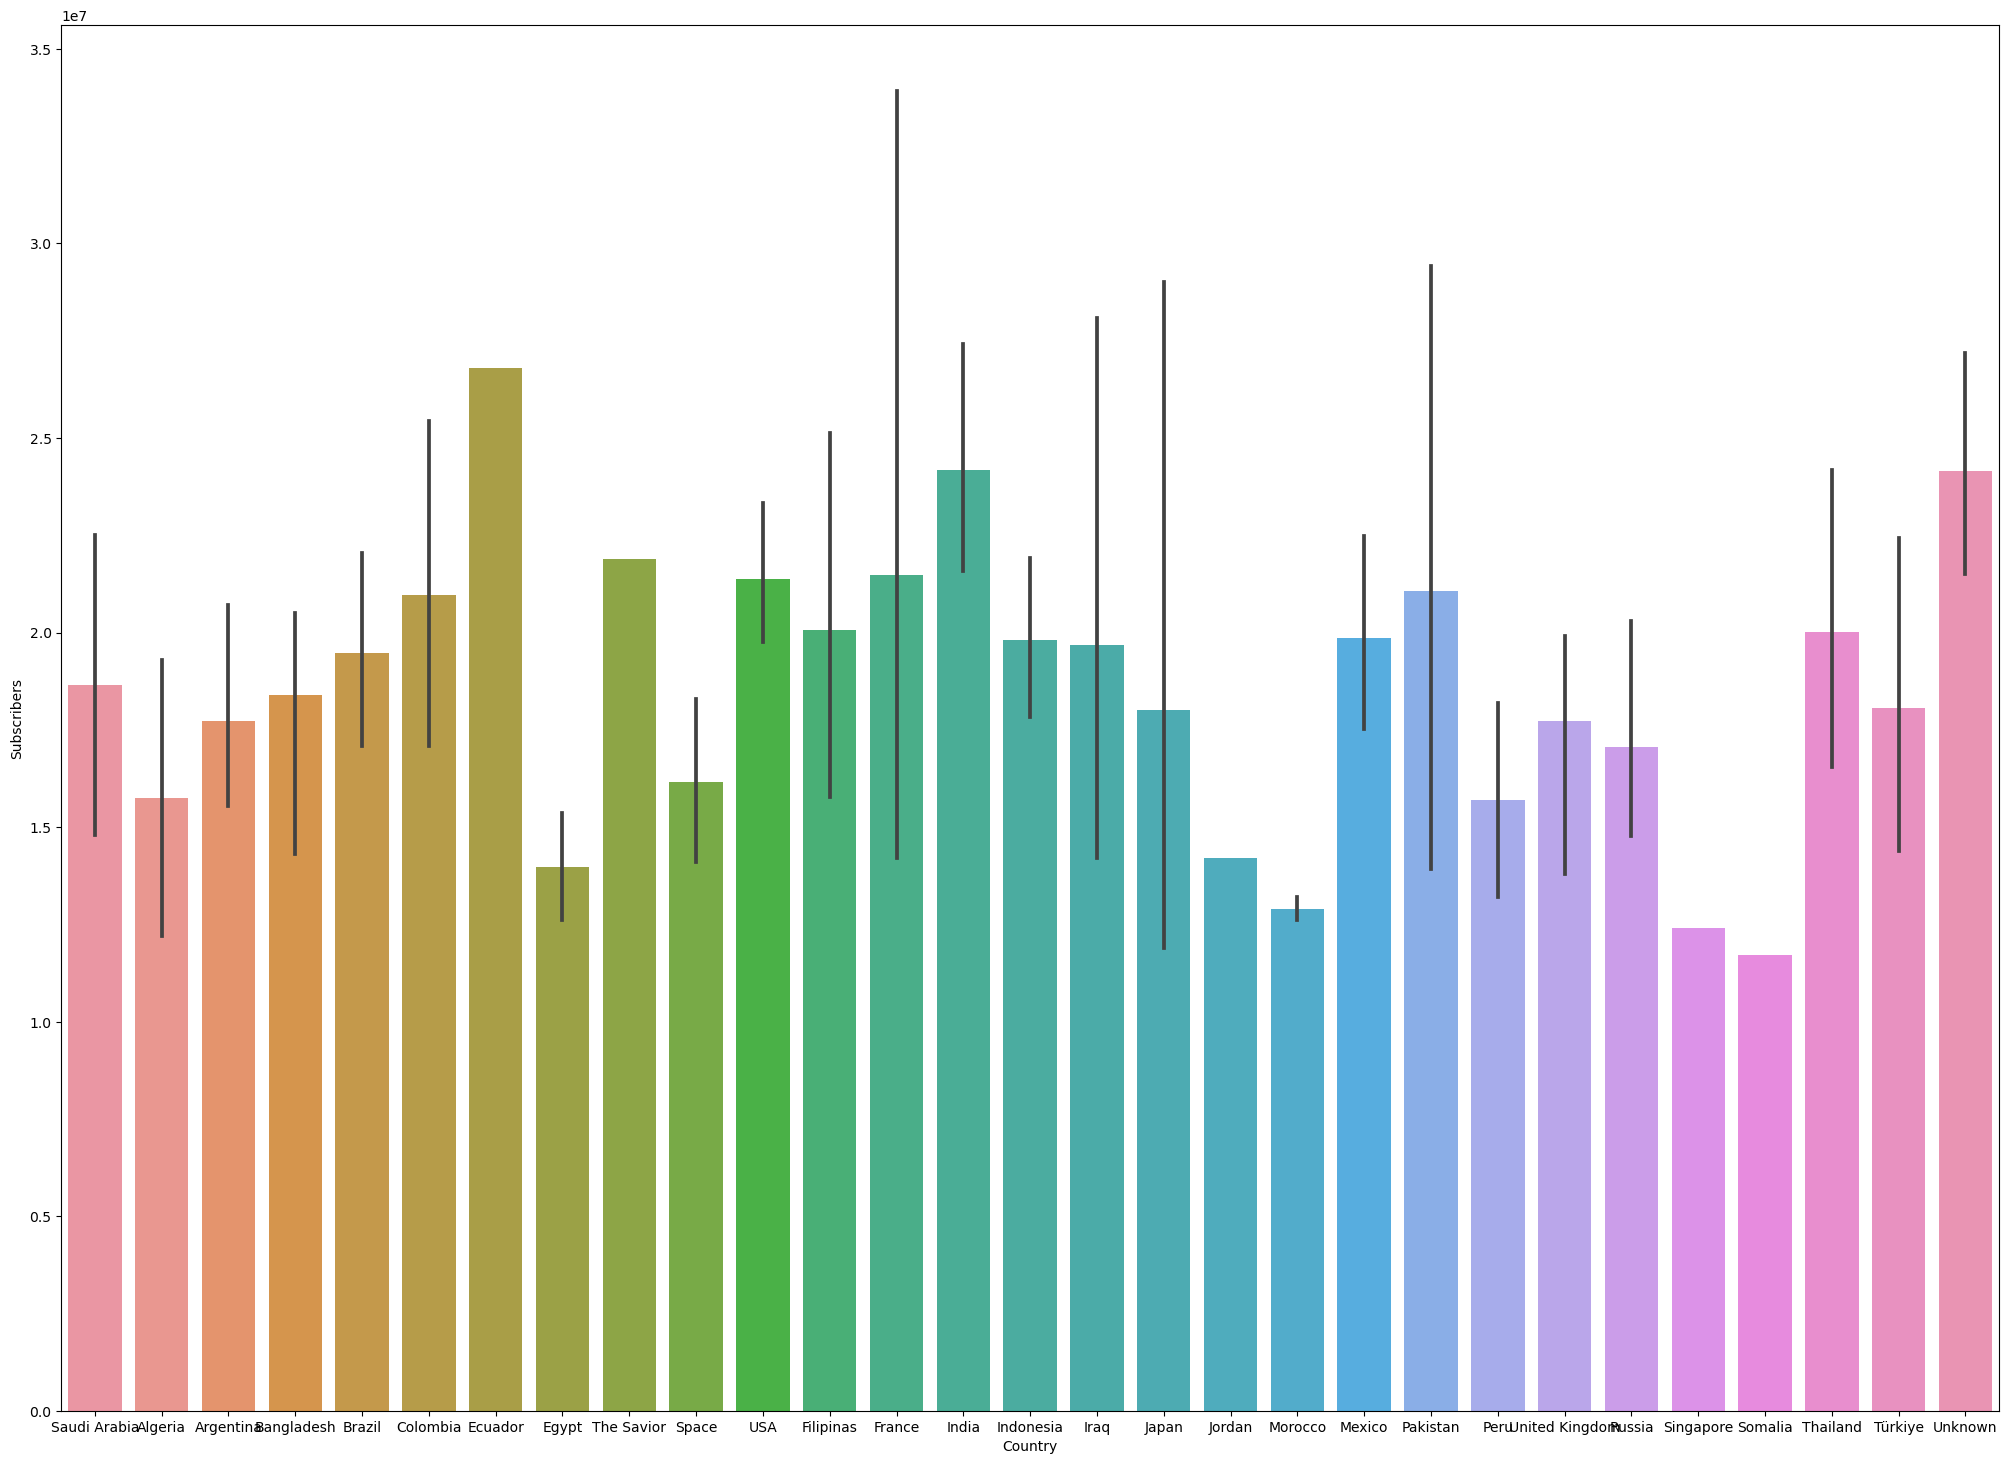

In [27]:
plt.figure(figsize=[25,18])
sns.barplot(x='Country', y='Subscribers', data=df_imputed)

Streamers from African countries appear to have the lowest subscriber counts (specifically Egypt, Morocco, and Somalia). Streamers with the highest subscriber counts came from a variety of countries (Ecuador, India, and unknown).

Earlier we saw a correlation between country and category, let's investigate this further.

<Axes: xlabel='Country', ylabel='count'>

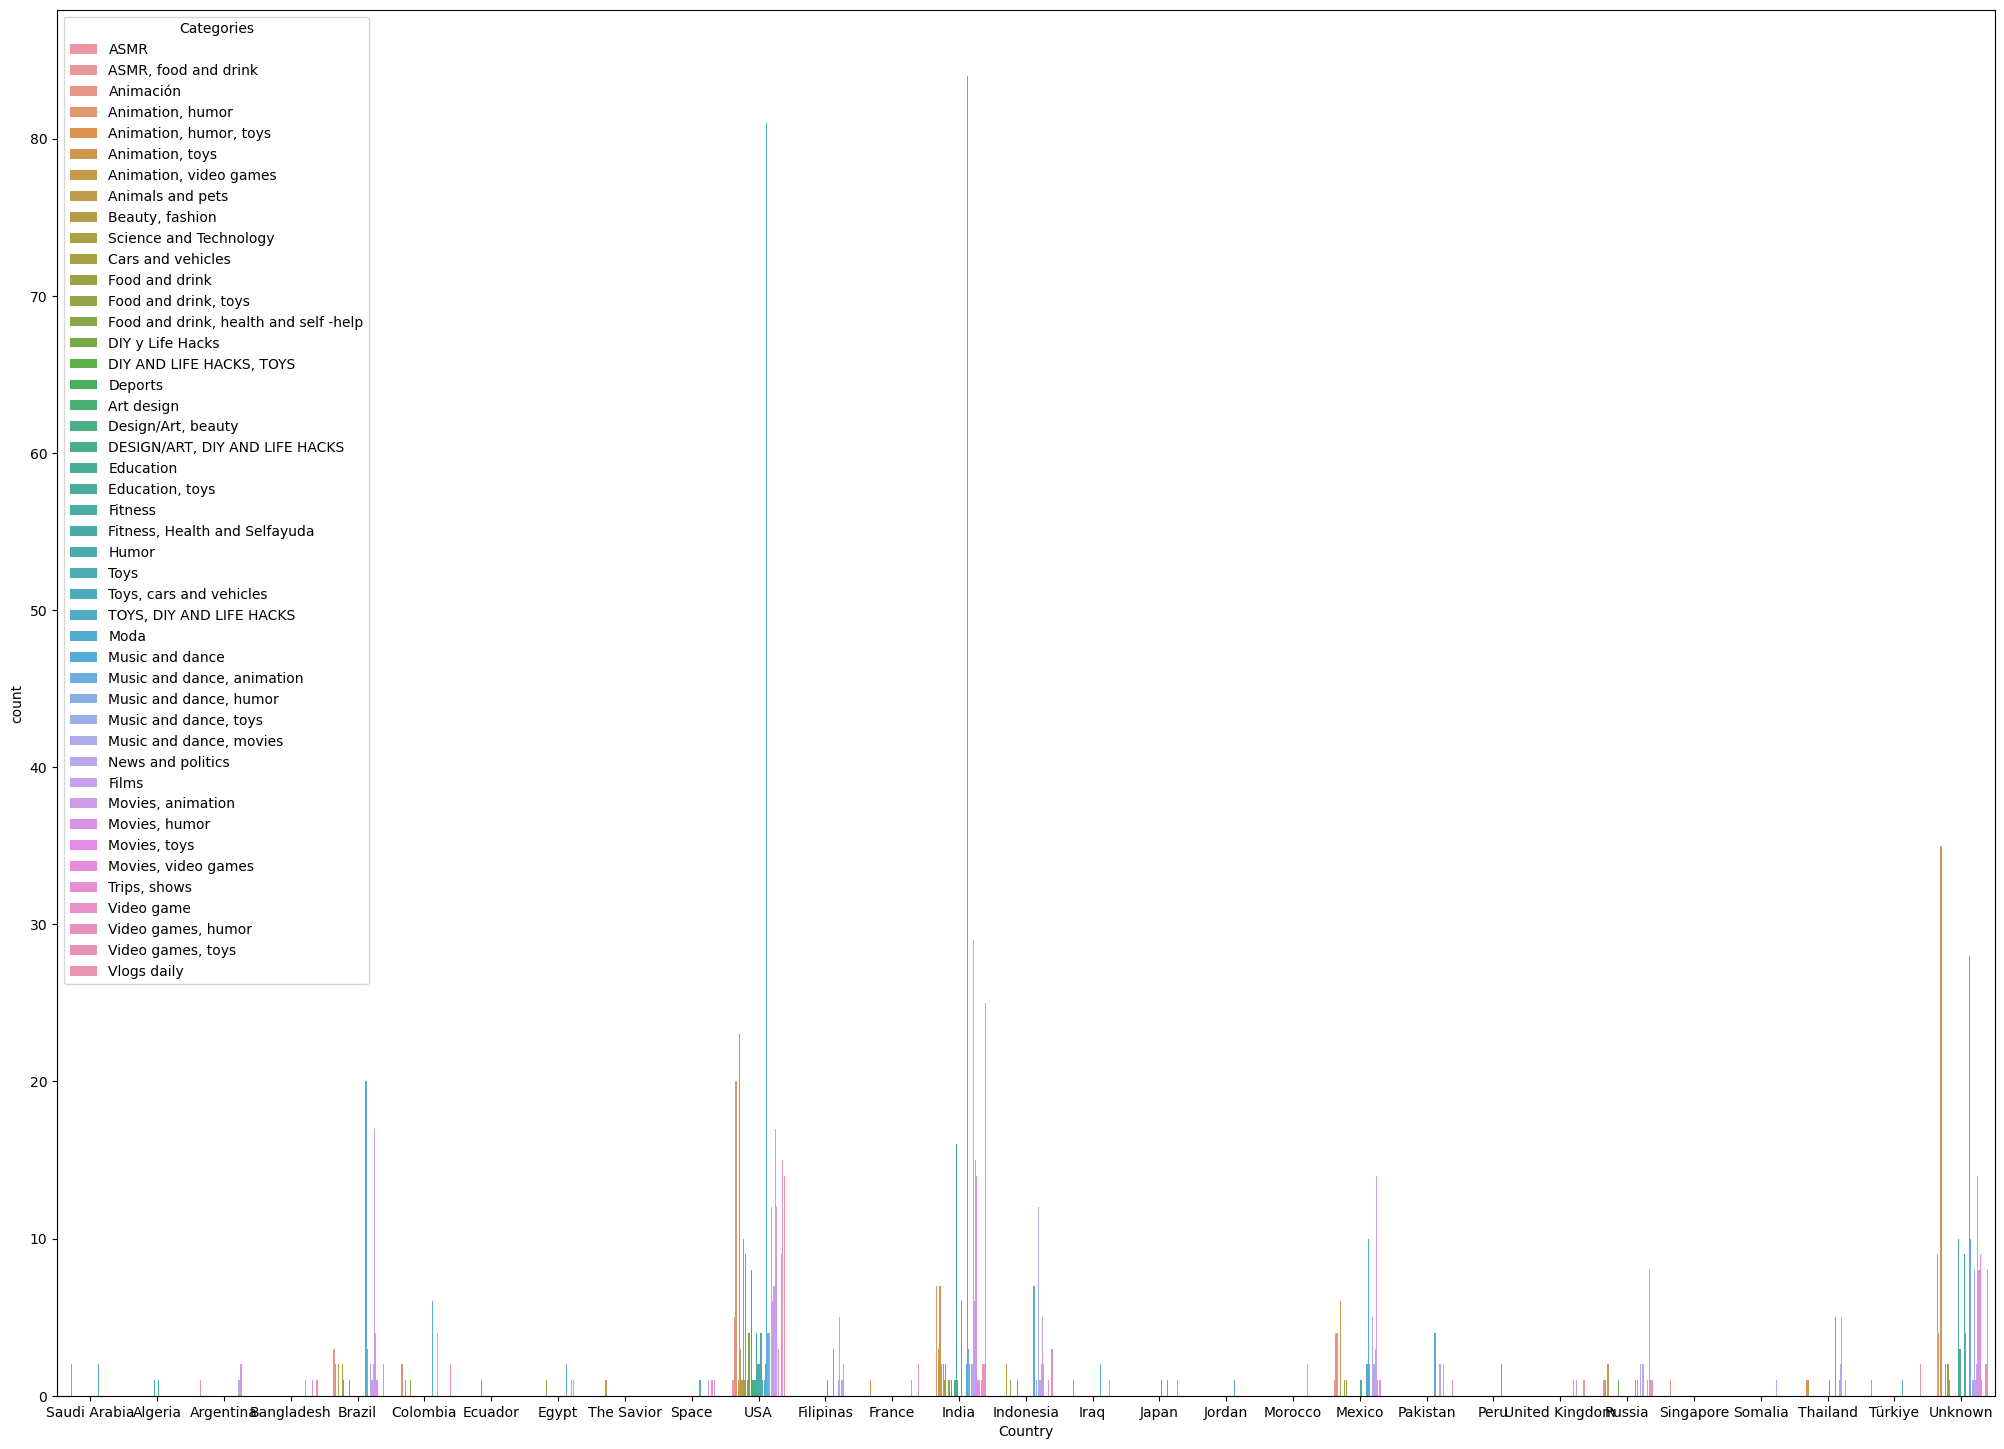

In [28]:
plt.figure(figsize=[25,18])
sns.countplot(x='Country', hue='Categories', data=df_imputed)

Music and dance is the most common category in most countries, with the notable exception of YouTubers from an unknown country being more likely to make animation videos. In Indonesia, Mexico, and Russia, Movies are the most popular category type. 

# 4. Performance Metrics <a name="metrics"></a>

## 4.1. Calculate and visualize the average number of subscribers, visits, likes, and comments <a name="average"></a>

In [29]:
df_imputed.mean(numeric_only=True)

Rank           5.005000e+02
Visits         1.209446e+06
Likes          5.363259e+04
Comments       1.288768e+03
Subscribers    2.189440e+07
dtype: float64

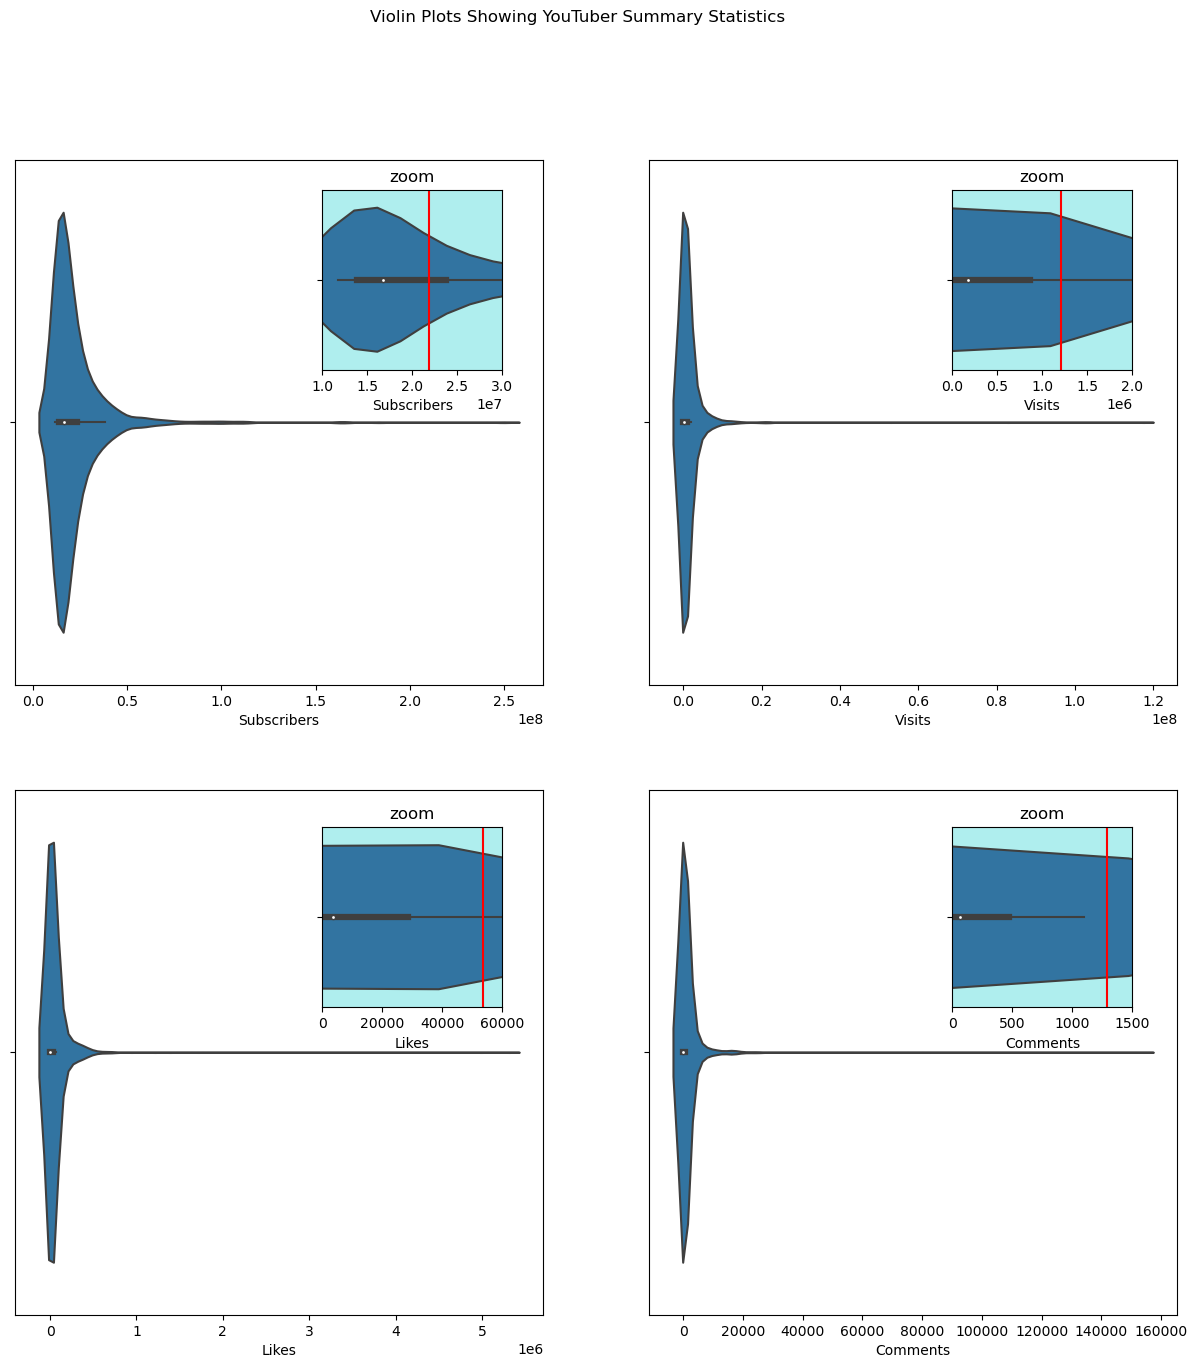

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Violin Plots Showing YouTuber Summary Statistics')
sns.violinplot(data=df_imputed, x='Subscribers', ax=axes[0,0])
sns.violinplot(data=df_imputed, x='Visits', ax=axes[0,1])
sns.violinplot(data=df_imputed, x='Likes', ax=axes[1,0])
sns.violinplot(data=df_imputed, x='Comments', ax=axes[1,1])

# Create Zoomed box of mean and median
ax2 = plt.axes([0.33, 0.74, .12, .12], facecolor='paleturquoise')
sns.violinplot(data=df_imputed, x='Subscribers', ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([10000000,30000000])
#add horizontal line at mean value of x
ax2 = plt.axvline(x=np.nanmean(df_imputed.Subscribers), color="red")

# Create Zoomed box of mean and median
ax3 = plt.axes([0.75, 0.74, .12, .12], facecolor='paleturquoise')
sns.violinplot(data=df_imputed, x='Visits', ax=ax3)
ax3.set_title('zoom')
ax3.set_xlim([0,2000000])
#add horizontal line at mean value of x
ax3 = plt.axvline(x=np.nanmean(df_imputed.Visits), color="red")

# Create Zoomed box of mean and median
ax4 = plt.axes([0.33, 0.315, .12, .12], facecolor='paleturquoise')
sns.violinplot(data=df_imputed, x='Likes', ax=ax4)
ax4.set_title('zoom')
ax4.set_xlim([0,60000])
#add horizontal line at mean value of x
ax4 = plt.axvline(x=np.nanmean(df_imputed.Likes), color="red")

# Create Zoomed box of mean and median
ax5 = plt.axes([0.75, 0.315, .12, .12], facecolor='paleturquoise')
sns.violinplot(data=df_imputed, x='Comments', ax=ax5)
ax5.set_title('zoom')
ax5.set_xlim([0,1500])
#add horizontal line at mean value of x
ax5 = plt.axvline(x=np.nanmean(df_imputed.Comments), color="red")

In the above visualisation, the red line represents the mean.

## 4.2. Are there patterns or anomalies in these metrics?<a name="patterns"></a>

The average is consistently much higher than the median due to the presence of a few really high values in the dataset raising the average. This means that the average is not an accurate representation of what the "average" YouTuber in this dataset is like and that median is more accurate.

# 5. Content Categories <a name="content"></a>

## 5.1. Explore the distribution of content categories. Which categories have the highest number of streamers?<a name="distcat"></a>

Most popular categories and the analysis can be seen under: 1.4. [Distributions](#dist)

## 5.2. Are there specific categories with exceptional performance metrics?<a name="catmetrics"></a>

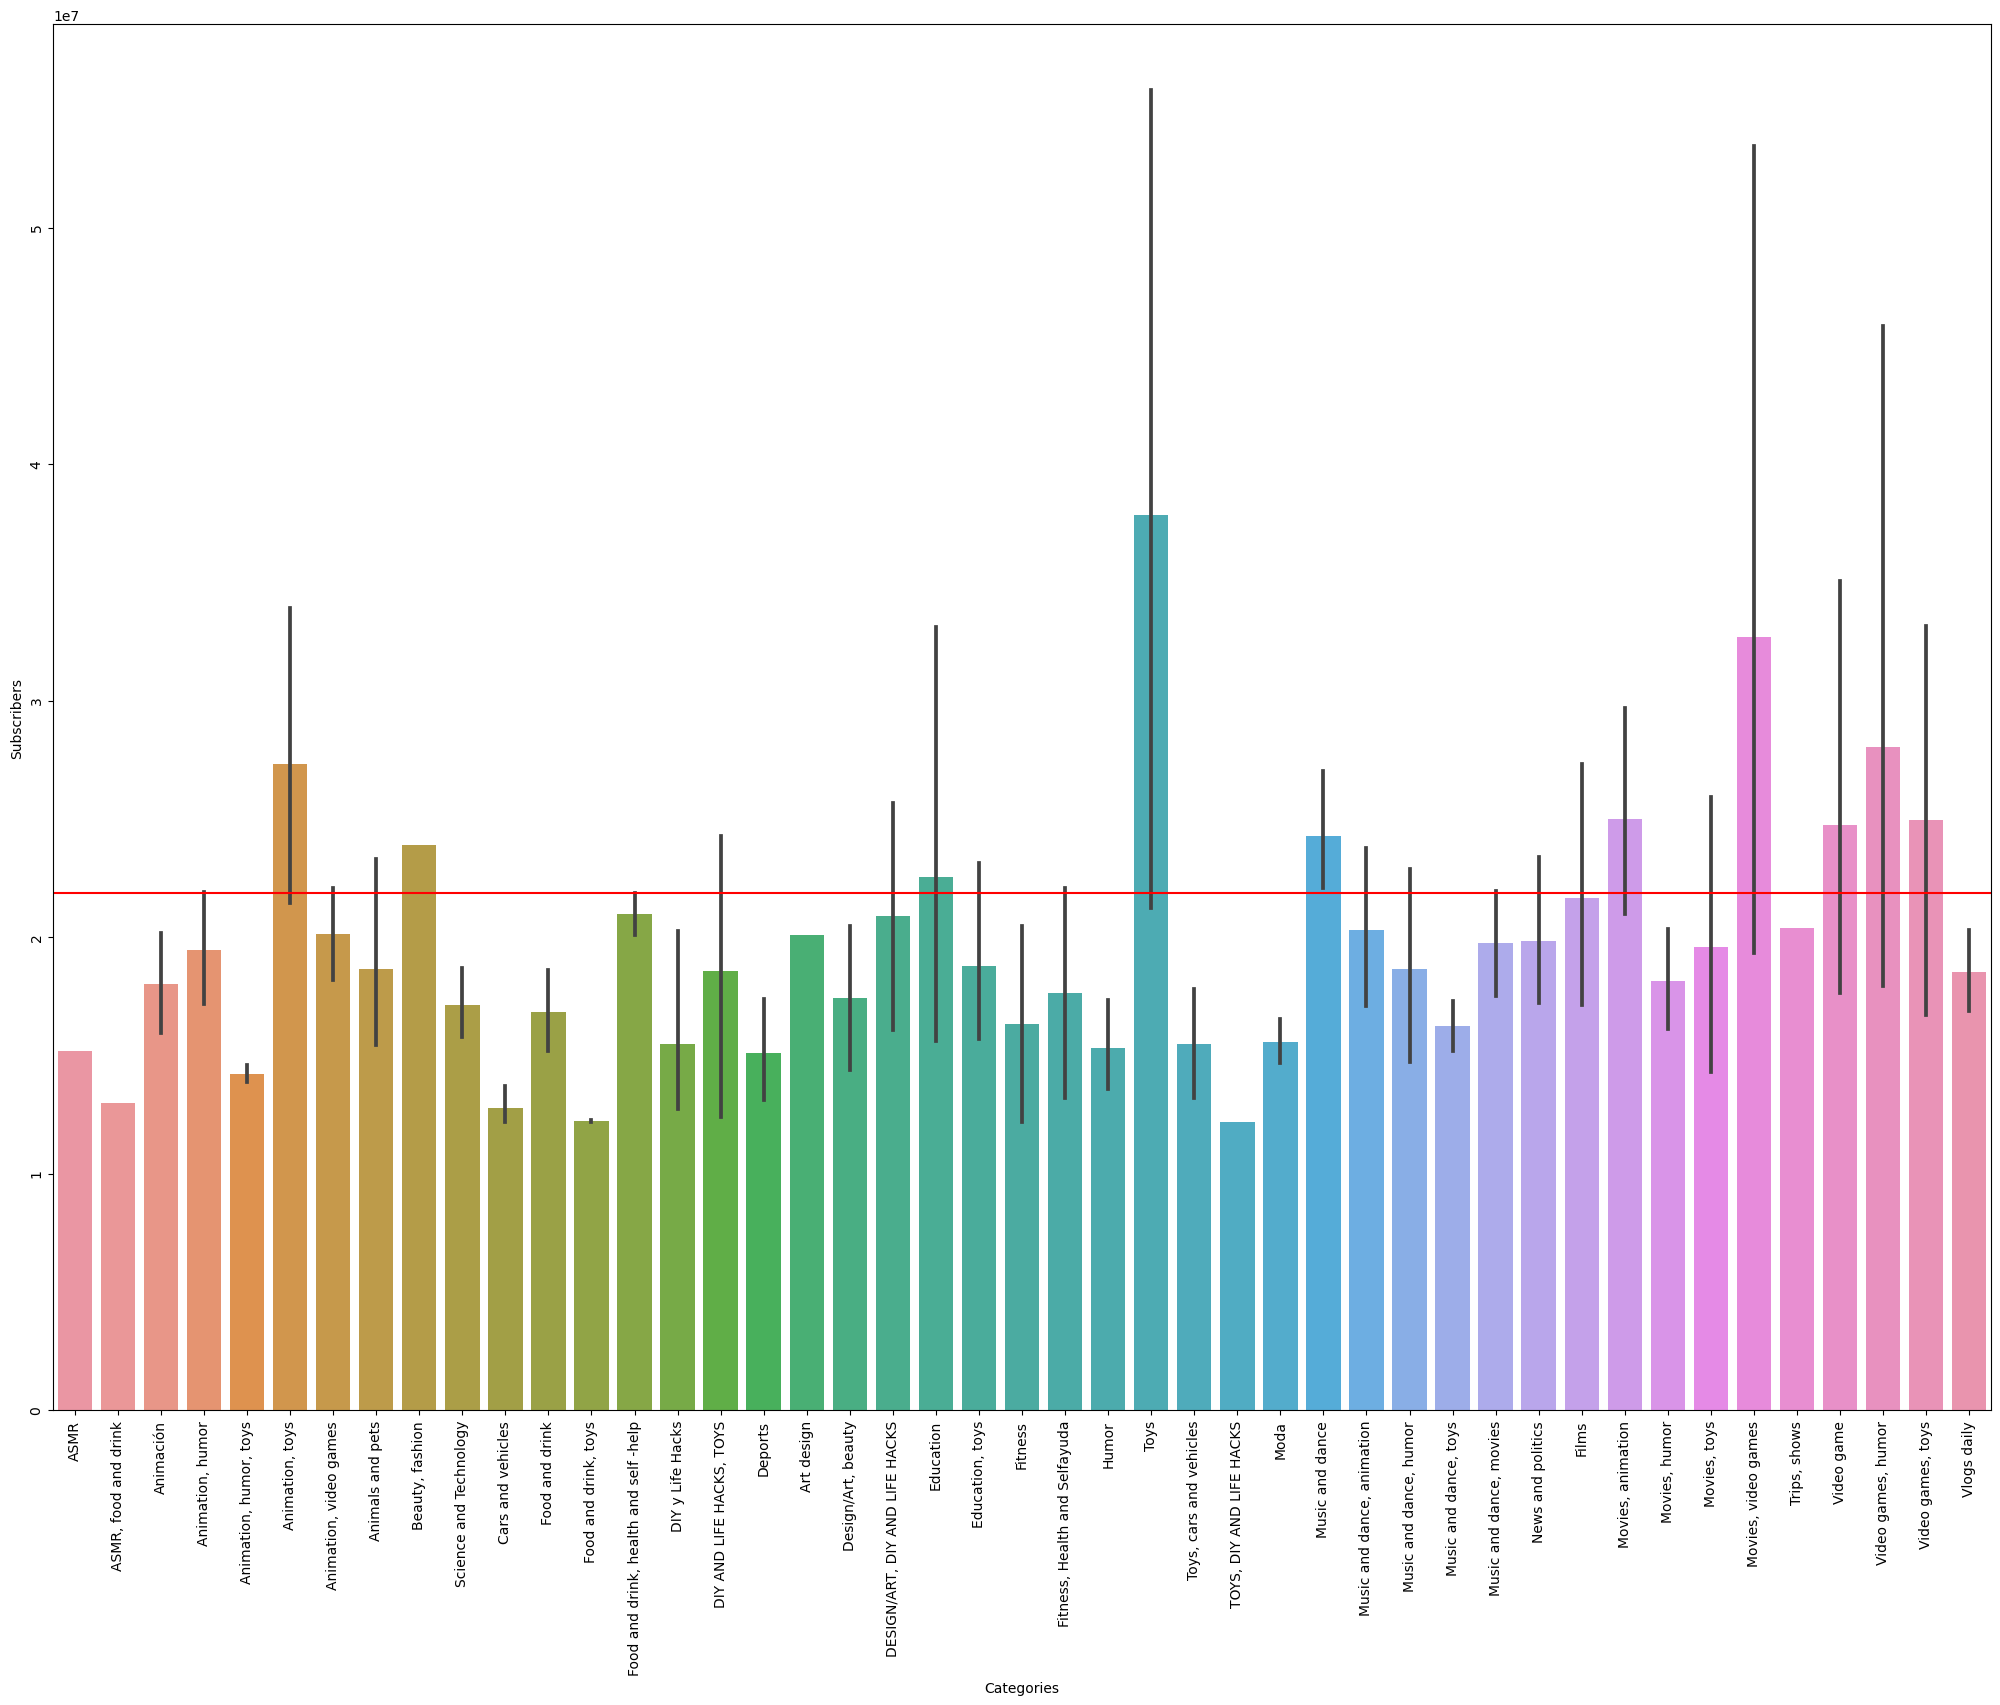

In [31]:
plt.figure(figsize=[25,18])
sns.barplot(x='Categories', y='Subscribers', data=df_imputed)
plt.tick_params(labelrotation=90)
plt.axhline(y=np.nanmean(df_imputed.Subscribers), color="red")

As we can see from the above graph, YouTubers that make videos about toys have almost double the average number of subscribers.

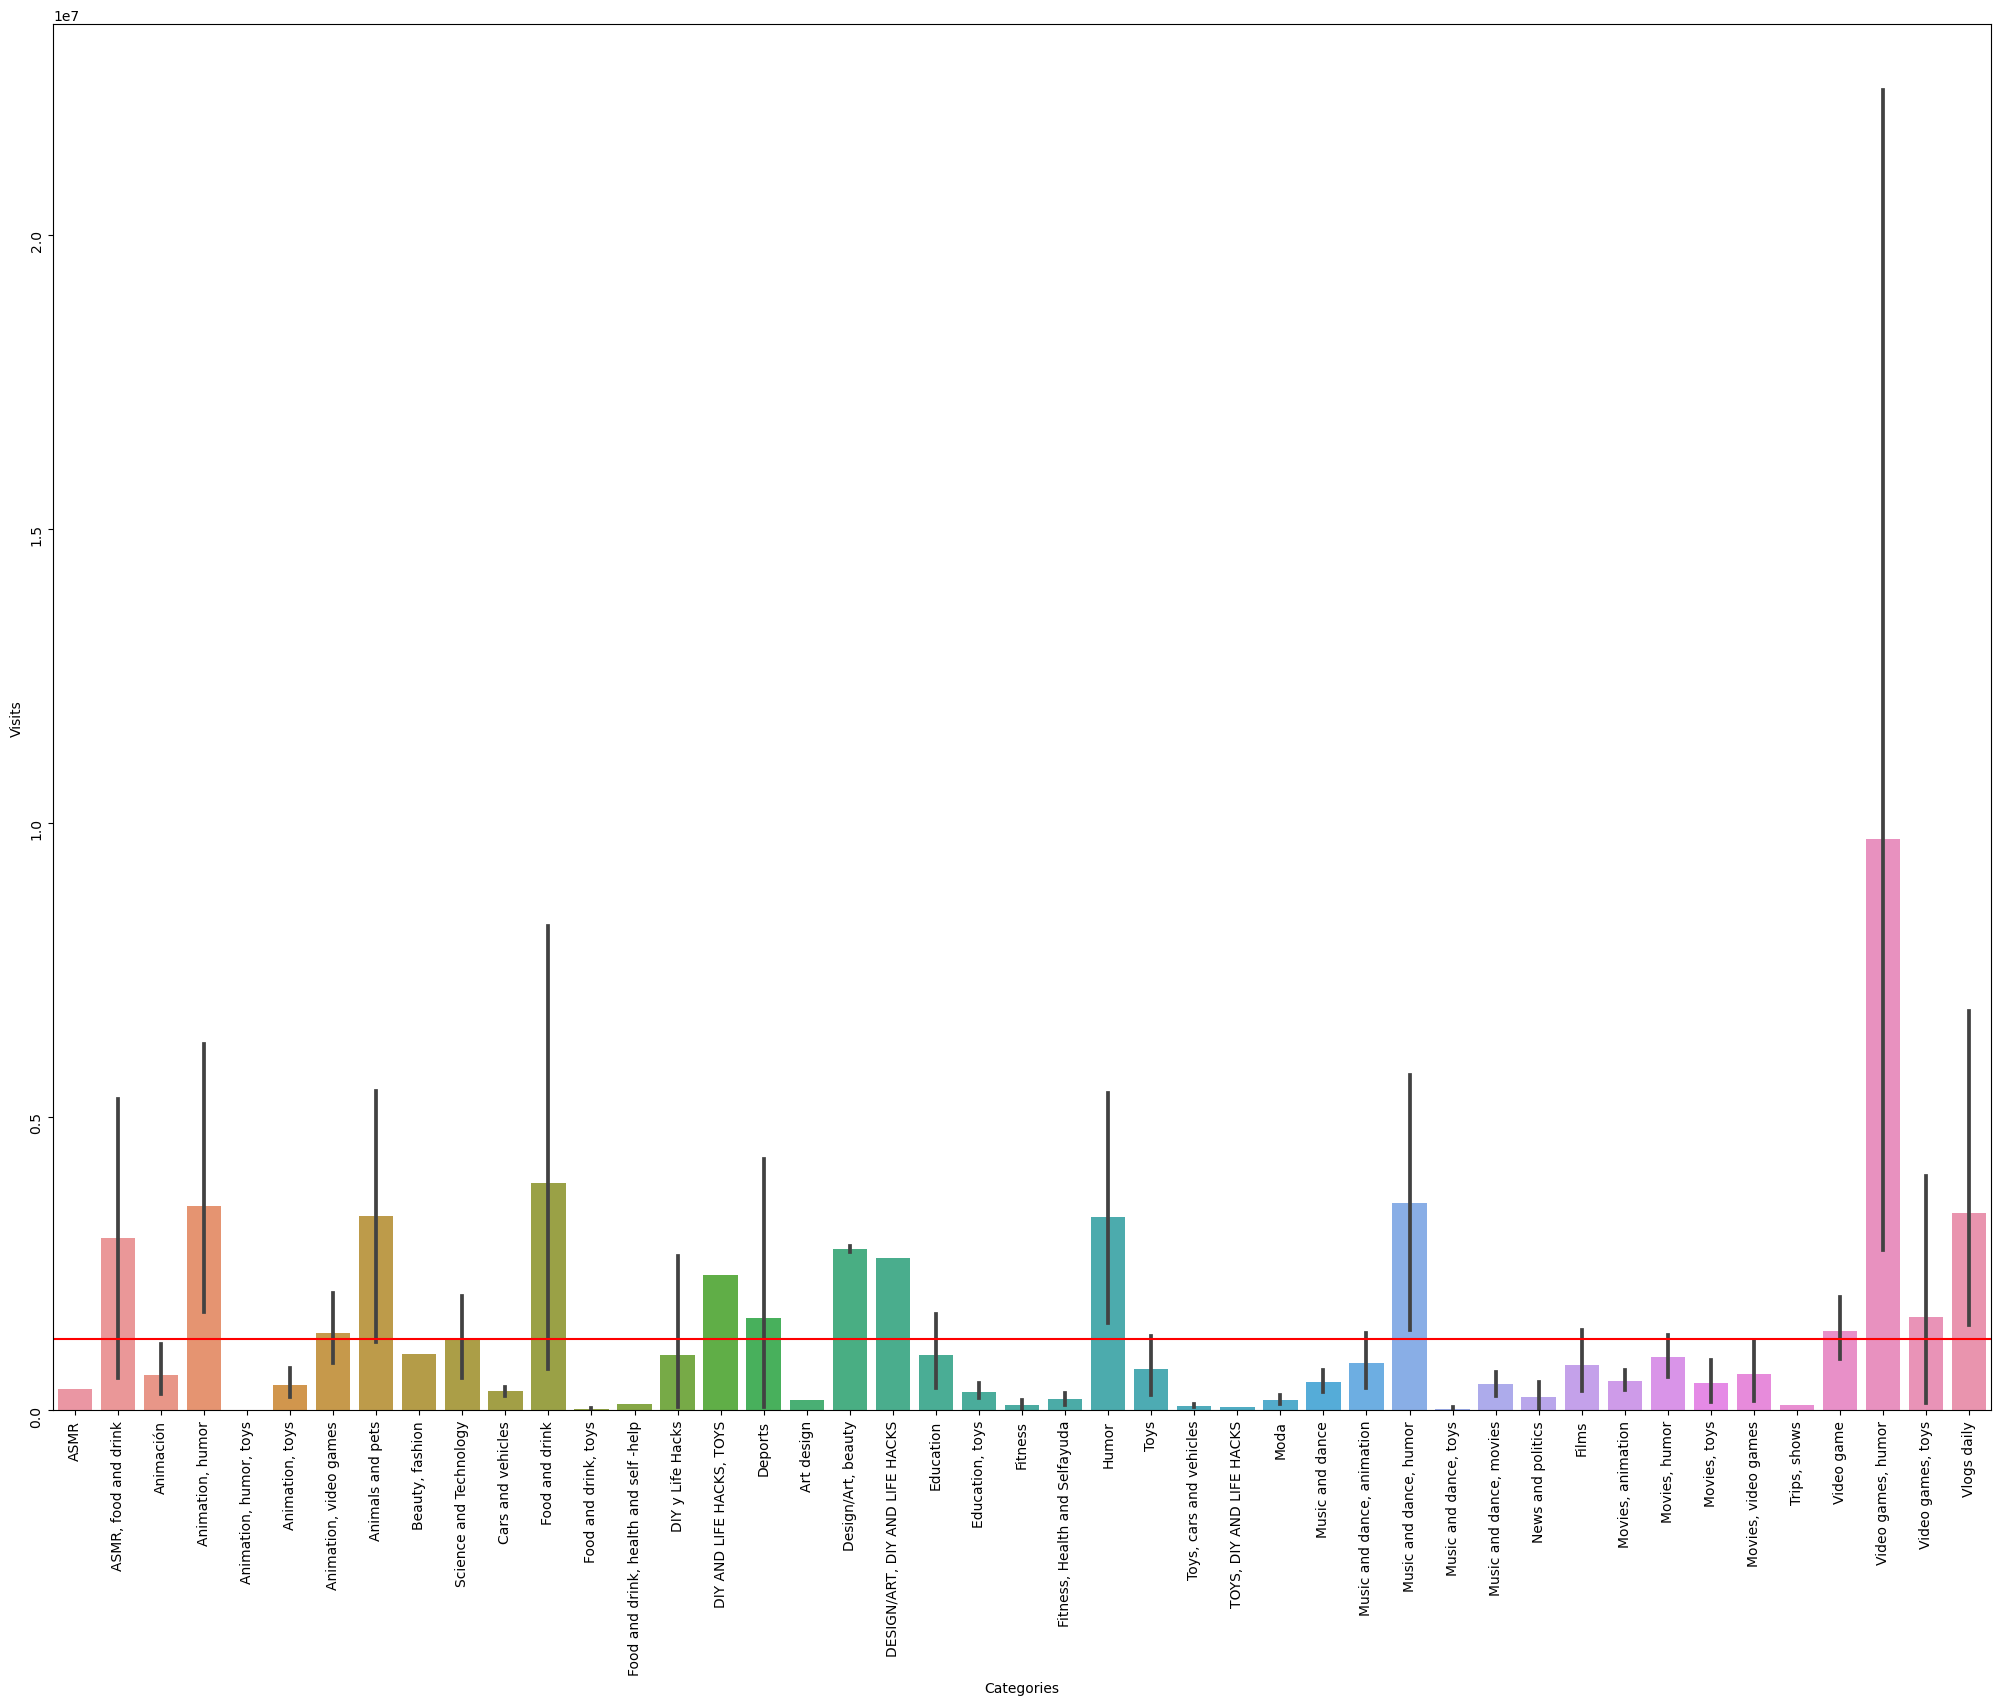

In [32]:
plt.figure(figsize=[25,18])
sns.barplot(x='Categories', y='Visits', data=df_imputed)
plt.tick_params(labelrotation=90)
plt.axhline(y=np.nanmean(df_imputed.Visits), color="red")

YouTube channels about video games, humor get about 10 times the visits that the average YouTube channel gets. 

The following categories get about double the visits as the average YouTube channel:
- ASMR, food and drink
- Animation humor
- Animals and pets
- Food and drink
- DIY and life hacks, toys
- Design/art, DIY and life hacks
- Humor
- Music and dance, humor
- Vlogs daily

Humor in general appears to perform well.

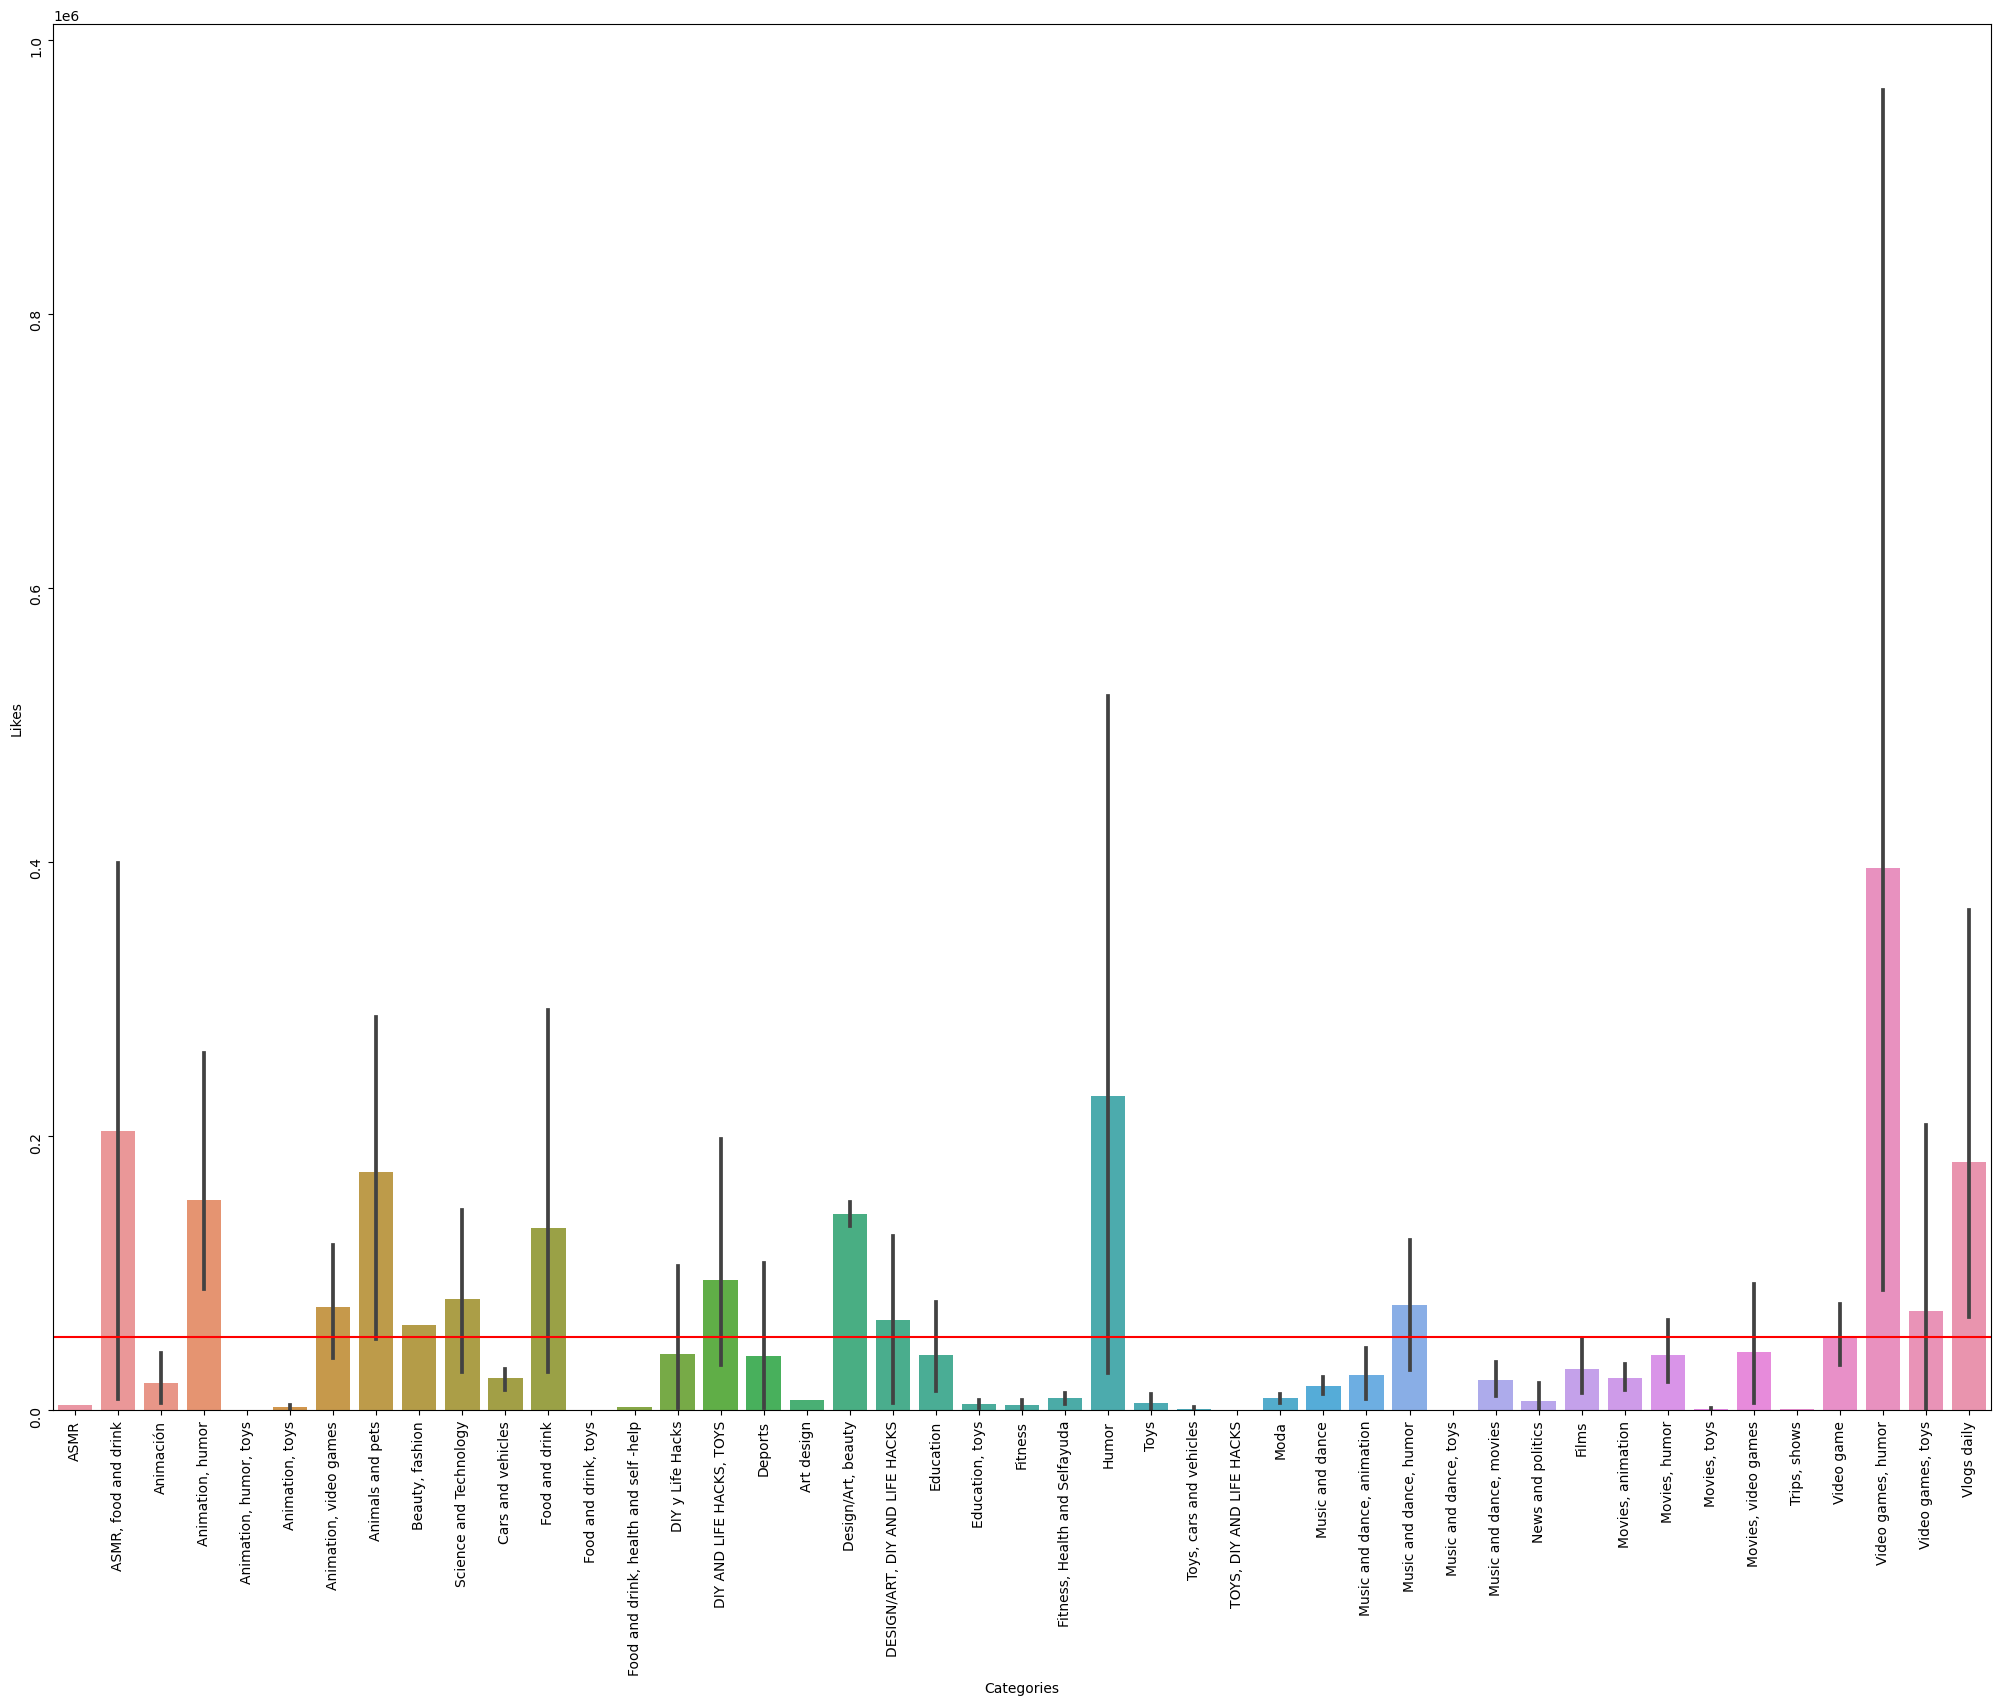

In [33]:
plt.figure(figsize=[25,18])
sns.barplot(x='Categories', y='Likes', data=df_imputed)
plt.tick_params(labelrotation=90)
plt.axhline(y=np.nanmean(df_imputed.Likes), color="red")

Channels about video games, humor get about 8 times the number of likes as on average.

Humor channels get about 5 times the average number of likes.

ASMR, food and drink; vlogs daily; and animals and pets get 3 times the average number of likes.

Animation, humor; food and drink; DIY life hacks, toys; and vlogs daily get twice the average number of likes.

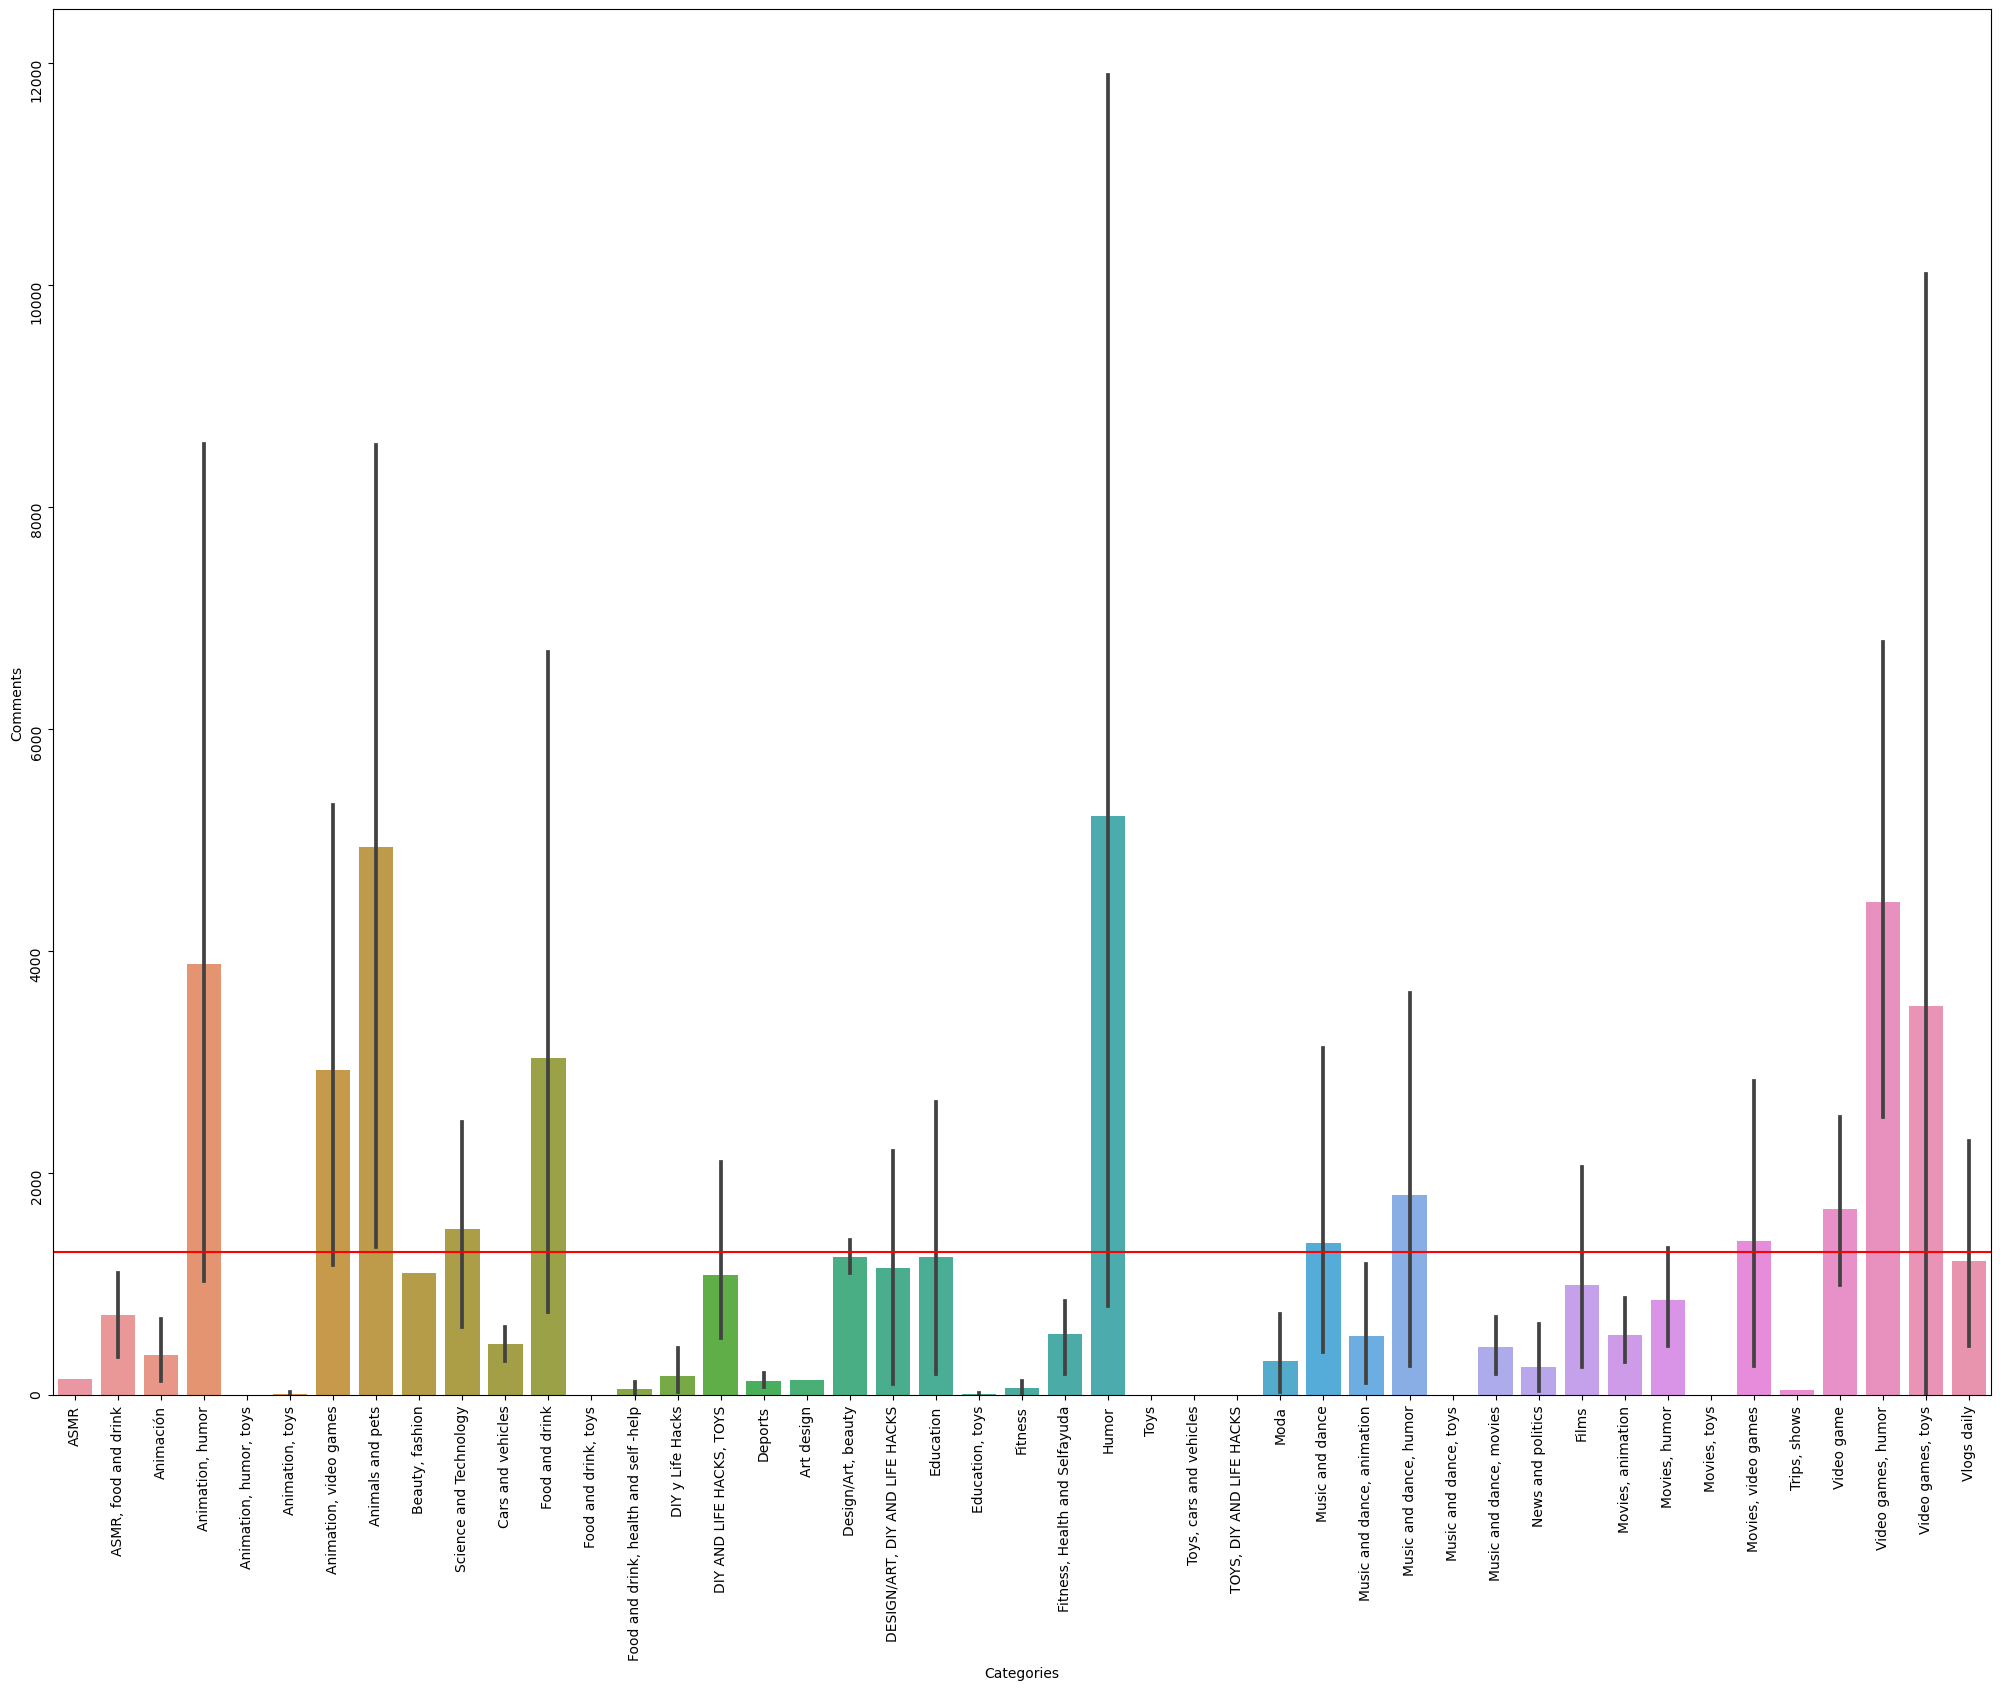

In [34]:
plt.figure(figsize=[25,18])
sns.barplot(x='Categories', y='Comments', data=df_imputed)
plt.tick_params(labelrotation=90)
plt.axhline(y=np.nanmean(df_imputed.Comments), color="red")

Humor and animals and pets channels get 4 times the average number of comments.

Animation, humor and video games, humor get 3 times the average number of comments.

Animation, video games; food and drink; and video games, toys get 2 times the average number of comments.



# 6. Benchmarking <a name="benchmark"></a>

## 6.1. Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.<a name="performance"></a>

In [35]:
above_avg_df = df_imputed.copy()
# Filter the df for only the streamers with above average performance 
above_avg_df = above_avg_df[(above_avg_df["Subscribers"]>np.nanmean(df_imputed.Subscribers))&
                            (above_avg_df["Visits"]>np.nanmean(df_imputed.Visits))&
                           (above_avg_df["Likes"]>np.nanmean(df_imputed.Likes))&
                           (above_avg_df["Comments"]>np.nanmean(df_imputed.Comments))]


In [36]:
above_avg_df.shape

(38, 8)

In [37]:
above_avg_df.head(38)

,Rank,Username,Categories,Country,Visits,Likes,Comments,Subscribers
1,2,MrBeast,"Video games, humor",USA,117400000.0,5300000.0,18500.0,183500000.0
5,6,PewDiePie,"Movies, video games",USA,2400000.0,197300.0,4900.0,111500000.0
26,27,dudeperfect,Video game,USA,5300000.0,156500.0,4200.0,59700000.0
34,35,TaylorSwift,Music and dance,USA,4300000.0,300400.0,15000.0,54100000.0
39,40,JuegaGerman,"Movies, animation",Mexico,2000000.0,117100.0,3000.0,48600000.0
43,44,A4a4a4a4,"Animation, humor",Russia,9700000.0,330400.0,22000.0,47300000.0
58,59,Mikecrack,"Movies, animation",Mexico,2200000.0,183400.0,1800.0,43400000.0
62,63,KimberlyLoaiza,Music and dance,Mexico,5300000.0,271300.0,16000.0,42100000.0
64,65,luisitocomunica,"Music and dance, movies",Mexico,2500000.0,128900.0,1800.0,41100000.0
70,71,JessNoLimit,"Movies, animation",Indonesia,1300000.0,73500.0,1600.0,39600000.0


## 6.2. Who are the top-performing content creators?<a name="top"></a>

Let's find the top 10 content creators of based on each performance metric.

In [88]:
# Create a new dataframe for sorting
df_top = df_imputed.copy()
# Sort the dataframe
df_top = df_top.sort_values(by="Subscribers", ascending=False)
# Get the top 10 content creators
df_top = df_top.iloc[:10,:]
df_top = df_top["Username"]
print(f"The content creators with the most subscribers are: \n {df_top}")

The content creators with the most subscribers are: 
 0               tseries
1               MrBeast
2             CoComelon
3              SETIndia
4         KidsDianaShow
5             PewDiePie
6    LikeNastyaofficial
7           VladandNiki
8       zeemusiccompany
9                   WWE
Name: Username, dtype: category
Categories (994, object): ['-genevievesplayhouse1465', '123GOSpanish', '123GO_', '1MILLION_Dance', ..., 'zeetvtelugu', 'zhong', 'zncoficial', 'zutigang']


In [85]:
# Create a new dataframe for sorting
df_top = df_imputed.copy()
# Sort the dataframe
df_top = df_top.sort_values(by="Visits", ascending=False)
# Get the top 10 content creators
df_top = df_top.iloc[:10,:]
df_top = df_top["Username"]
print(f"The content creators with the most visits are: \n {df_top}")

The content creators with the most visits are: 
 1                    MrBeast
136                 MrBeast2
153                DaFuqBoom
488        BeastPhilanthropy
288    VillageCookingChannel
390              jaanvipatel
586                 _vector_
958                  dojacat
300             alfredolarin
805                  NickPro
Name: Username, dtype: category
Categories (994, object): ['-genevievesplayhouse1465', '123GOSpanish', '123GO_', '1MILLION_Dance', ..., 'zeetvtelugu', 'zhong', 'zncoficial', 'zutigang']


In [86]:
# Create a new dataframe for sorting
df_top = df_imputed.copy()
# Sort the dataframe
df_top = df_top.sort_values(by="Likes", ascending=False)
# Get the top 10 content creators
df_top = df_top.iloc[:10,:]
df_top = df_top["Username"]
print(f"The content creators with the most likes are: \n {df_top}")

The content creators with the most likes are: 
 1                MrBeast
136             MrBeast2
153            DaFuqBoom
341      triggeredinsaan
734              Mythpat
488    BeastPhilanthropy
586             _vector_
300         alfredolarin
123       MRINDIANHACKER
238           alanbecker
Name: Username, dtype: category
Categories (994, object): ['-genevievesplayhouse1465', '123GOSpanish', '123GO_', '1MILLION_Dance', ..., 'zeetvtelugu', 'zhong', 'zncoficial', 'zutigang']


In [87]:
# Create a new dataframe for sorting
df_top = df_imputed.copy()
# Sort the dataframe
df_top = df_top.sort_values(by="Comments", ascending=False)
# Get the top 10 content creators
df_top = df_top.iloc[:10,:]
df_top = df_top["Username"]
print(f"The content creators with the most comments are: \n {df_top}")

The content creators with the most comments are: 
 436    BispoBrunoLeonardo
153             DaFuqBoom
958               dojacat
177                DanTDM
341       triggeredinsaan
123        MRINDIANHACKER
488     BeastPhilanthropy
43               A4a4a4a4
132                 dream
1                 MrBeast
Name: Username, dtype: category
Categories (994, object): ['-genevievesplayhouse1465', '123GOSpanish', '123GO_', '1MILLION_Dance', ..., 'zeetvtelugu', 'zhong', 'zncoficial', 'zutigang']


# 7. Content Recommendations <a name="recommend"></a>

## 7.1. Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics. <a name="system"></a>

Many recommender system suffer from a "cold start" problem where they do not have information once a user first joins about their preferences. To overcome this problem, YouTube could recommend videos from the categories and streamers that are performing the best at that point in time, adjusted for the location of the user and what local preferences are. YouTube has a very powerful algorithm but struggles in the beginning, this may help alleviate the issues in the beginning by catering to what is likely to resonate with the average user.